In [2]:
import pandas as pd
import numpy as np
import matplotlib . pyplot as plt
df = pd.read_csv(r'nba_2022-23_all_stats_with_salary.csv')
df2 = pd.read_csv('nba_Position.csv')
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]
df2.to_csv('nba_PositionCleaned.csv', index = False)
df3 = pd.read_csv('nba_PositionCleaned.csv')

In [3]:
# original dataset
print(df)
print()
# first cleanup 
print(df2)
print()
# final cleanup
print(df3)

     Unnamed: 0        Player Name    Salary Position  Age     Team  GP  GS  \
0             0      Stephen Curry  48070014       PG   34      GSW  56  56   
1             1          John Wall  47345760       PG   32      LAC  34   3   
2             2  Russell Westbrook  47080179       PG   34  LAL/LAC  73  24   
3             3       LeBron James  44474988       PF   38      LAL  55  54   
4             4       Kevin Durant  44119845       PF   34  BRK/PHO  47  47   
..          ...                ...       ...      ...  ...      ...  ..  ..   
462         462      Justin Minaya     35096       SF   23      POR   4   0   
463         463       Kobi Simmons     32795       SG   25      CHO   5   0   
464         464          Gabe York     32171       SG   29      IND   3   0   
465         465       RaiQuan Gray      5849       PF   23      BRK   1   0   
466         466      Jacob Gilyard      5849       PG   24      MEM   1   0   

       MP    FG  ...  TOV%  USG%  OWS  DWS   WS  WS

In [4]:
numRows, numCol = df2.shape
print("The number of rows are",numRows)
print("The number of columns are",numCol)

The number of rows are 467
The number of columns are 31


In [5]:
from tabulate import tabulate

dataType = pd.DataFrame(df3.dtypes, columns = ['Data Type'])
dataType.index.name = 'Column Name'

table = tabulate(dataType, headers = 'keys', tablefmt = 'pipe', stralign = 'center')
print("The type of data of the dataset are as follows:")
print("")
print(table)

The type of data of the dataset are as follows:

|    Column Name    |  Data Type  |
|:-----------------:|:-----------:|
|    Player Name    |   object    |
|      Salary       |    int64    |
|     Position      |   object    |
|        Age        |    int64    |
|       Team        |   object    |
|        GP         |    int64    |
|        GS         |    int64    |
|        MP         |   float64   |
|        FG         |   float64   |
|        FGA        |   float64   |
|        FG%        |   float64   |
|        3P         |   float64   |
|        3PA        |   float64   |
|        3P%        |   float64   |
|        2P         |   float64   |
|        2PA        |   float64   |
|        2P%        |   float64   |
|       eFG%        |   float64   |
|        FT         |   float64   |
|        FTA        |   float64   |
|        FT%        |   float64   |
|        ORB        |   float64   |
|        DRB        |   float64   |
|        TRB        |   float64   |
|        AST   

In [6]:
positions = ["C", "PF", "PG", "SF", "SG"]
statistics = ["mean", "mode", "median", "range", "std", "var"]

In [7]:
class Format:
    end = '\033[0m'
    underline = '\033[4m'
    
for position in positions:
    print(f"{Format.underline}\n{position} SALARY\n{Format.end}")
    subset = df3[df3["Position"] == position]
    
    for stat in statistics:
        if stat == "mode":
            modeVal = subset["Salary"].mode().iloc[0] if not subset.empty else "N/A"
            print(f"The {stat} value of the {position} Salary is {modeVal:.2f}")
        elif stat == "range":
            maxVal = subset["Salary"].max() if not subset.empty else "N/A"
            minVal = subset["Salary"].min() if not subset.empty else "N/A"
            rangeVal = maxVal - minVal
            print(f"The {stat} value of the {position} Salary is {rangeVal:.2f}")
        elif stat == "mean":
            meanVal = subset["Salary"].mean() if not subset.empty else "N/A"
            print(f"The {stat} value of the {position} Salary is {meanVal:.2f}")
        else:
            statVal = getattr(subset["Salary"], stat)()
            print(f"The {stat} value of the {position} Salary is {statVal:.2f}")
        print()


C SALARY

The mean value of the C Salary is 7282722.11

The mode value of the C Salary is 2905851.00

The median value of the C Salary is 2905851.00

The range value of the C Salary is 38055428.00

The std value of the C Salary is 8983557.54

The var value of the C Salary is 80704306002603.25


PF SALARY

The mean value of the PF Salary is 8885045.35

The mode value of the PF Salary is 508891.00

The median value of the PF Salary is 4358959.50

The range value of the PF Salary is 44469139.00

The std value of the PF Salary is 10897788.62

The var value of the PF Salary is 118761796754559.11


PG SALARY

The mean value of the PG Salary is 11579573.47

The mode value of the PG Salary is 1563518.00

The median value of the PG Salary is 4833600.00

The range value of the PG Salary is 48064165.00

The std value of the PG Salary is 13889342.37

The var value of the PG Salary is 192913831452798.25


SF SALARY

The mean value of the SF Salary is 8132252.89

The mode value of the SF Salary is 

In [8]:
# dictionary to map statistics
statFunctions = {
    "mean": "mean",
    "mode": lambda x: x.mode().iloc[0] if not x.empty else "N/A",
    "median": "median",
    "range": lambda x: x.max() - x.min() if not x.empty else "N/A",
    "std": "std",
    "var": "var"
}

fgColumn = "FG"

for stat in statistics:
    print(f"{Format.underline}\n{stat} {fgColumn} (field goals) Per Game\n{Format.end}")

    for position in positions:
        print(f"{Format.underline}\n{position} {fgColumn}\n{Format.end}")
        subset = df3[df3["Position"] == position][fgColumn]

        statFunc = statFunctions[stat]

        if callable(statFunc):
            statVal = statFunc(subset)
        else:
            statVal = getattr(subset, statFunc)()

        print(f"The {stat} value of the {position} {fgColumn} made per game is {statVal:.2f}")
        print()


mean FG (field goals) Per Game


C FG

The mean value of the C FG made per game is 2.91


PF FG

The mean value of the PF FG made per game is 3.58


PG FG

The mean value of the PG FG made per game is 3.79


SF FG

The mean value of the SF FG made per game is 3.16


SG FG

The mean value of the SG FG made per game is 3.32


mode FG (field goals) Per Game


C FG

The mode value of the C FG made per game is 1.50


PF FG

The mode value of the PF FG made per game is 2.10


PG FG

The mode value of the PG FG made per game is 3.90


SF FG

The mode value of the SF FG made per game is 2.30


SG FG

The mode value of the SG FG made per game is 1.90


median FG (field goals) Per Game


C FG

The median value of the C FG made per game is 2.30


PF FG

The median value of the PF FG made per game is 2.80


PG FG

The median value of the PG FG made per game is 3.20


SF FG

The median value of the SF FG made per game is 2.50


SG FG

The median value of the SG FG made per game is 2.80


range FG 

In [9]:
fg3Column = "3P"

for stat in statistics:
    print(f"{Format.underline}\n{stat} {fg3Column} (3 point) Field Goals Per Game\n{Format.end}")

    for position in positions:
        print(f"{Format.underline}\n{position} {fg3Column}\n{Format.end}")
        subset = df3[df3["Position"] == position][fg3Column]

        statFunc = statFunctions[stat]

        if callable(statFunc):
            statVal = statFunc(subset)
        else:
            statVal = getattr(subset, statFunc)()

        print(f"The {stat} value of the {position} {fg3Column} field goals made per game is {statVal:.2f}")
        print()


mean 3P (3 point) Field Goals Per Game


C 3P

The mean value of the C 3P field goals made per game is 0.33


PF 3P

The mean value of the PF 3P field goals made per game is 0.94


PG 3P

The mean value of the PG 3P field goals made per game is 1.25


SF 3P

The mean value of the SF 3P field goals made per game is 1.13


SG 3P

The mean value of the SG 3P field goals made per game is 1.25


mode 3P (3 point) Field Goals Per Game


C 3P

The mode value of the C 3P field goals made per game is 0.00


PF 3P

The mode value of the PF 3P field goals made per game is 0.00


PG 3P

The mode value of the PG 3P field goals made per game is 0.40


SF 3P

The mode value of the SF 3P field goals made per game is 0.80


SG 3P

The mode value of the SG 3P field goals made per game is 0.60


median 3P (3 point) Field Goals Per Game


C 3P

The median value of the C 3P field goals made per game is 0.10


PF 3P

The median value of the PF 3P field goals made per game is 0.75


PG 3P

The median value 

In [10]:
fg2Column = "2P"

for stat in statistics:
    print(f"{Format.underline}\n{stat} {fg2Column} (2 point) Field Goals Made Per Game\n{Format.end}")

    for position in positions:
        print(f"{Format.underline}\n{position} {fg2Column}\n{Format.end}")
        subset = df3[df3["Position"] == position][fg2Column]

        statFunc = statFunctions[stat]

        if callable(statFunc):
            statVal = statFunc(subset)
        else:
            statVal = getattr(subset, statFunc)()

        print(f"The {stat} value of the {position} {fg2Column} field goals made per game is {statVal:.2f}")
        print()


mean 2P (2 point) Field Goals Made Per Game


C 2P

The mean value of the C 2P field goals made per game is 2.58


PF 2P

The mean value of the PF 2P field goals made per game is 2.64


PG 2P

The mean value of the PG 2P field goals made per game is 2.54


SF 2P

The mean value of the SF 2P field goals made per game is 2.02


SG 2P

The mean value of the SG 2P field goals made per game is 2.08


mode 2P (2 point) Field Goals Made Per Game


C 2P

The mode value of the C 2P field goals made per game is 0.80


PF 2P

The mode value of the PF 2P field goals made per game is 0.80


PG 2P

The mode value of the PG 2P field goals made per game is 0.90


SF 2P

The mode value of the SF 2P field goals made per game is 0.50


SG 2P

The mode value of the SG 2P field goals made per game is 0.90


median 2P (2 point) Field Goals Made Per Game


C 2P

The median value of the C 2P field goals made per game is 2.00


PF 2P

The median value of the PF 2P field goals made per game is 1.75


PG 2P

Th

In [11]:
ftColumn = "FT"

for stat in statistics:
    print(f"{Format.underline}\n{stat} {ftColumn} (free throws) Per Game\n{Format.end}")

    for position in positions:
        print(f"{Format.underline}\n{position} {ftColumn}\n{Format.end}")
        subset = df3[df3["Position"] == position][ftColumn]

        statFunc = statFunctions[stat]

        if callable(statFunc):
            statVal = statFunc(subset)
        else:
            statVal = getattr(subset, statFunc)()

        print(f"The {stat} value of the {position} {ftColumn} made per game is {statVal:.2f}")
        print()


mean FT (free throws) Per Game


C FT

The mean value of the C FT made per game is 1.30


PF FT

The mean value of the PF FT made per game is 1.53


PG FT

The mean value of the PG FT made per game is 1.81


SF FT

The mean value of the SF FT made per game is 1.23


SG FT

The mean value of the SG FT made per game is 1.35


mode FT (free throws) Per Game


C FT

The mode value of the C FT made per game is 0.60


PF FT

The mode value of the PF FT made per game is 0.30


PG FT

The mode value of the PG FT made per game is 0.00


SF FT

The mode value of the SF FT made per game is 0.00


SG FT

The mode value of the SG FT made per game is 0.70


median FT (free throws) Per Game


C FT

The median value of the C FT made per game is 0.90


PF FT

The median value of the PF FT made per game is 0.80


PG FT

The median value of the PG FT made per game is 1.00


SF FT

The median value of the SF FT made per game is 0.80


SG FT

The median value of the SG FT made per game is 0.90


range FT 

In [12]:
trbColumn = "TRB"

for stat in statistics:
    print(f"{Format.underline}\n{stat} {trbColumn} (total rebounds) Per Game\n{Format.end}")

    for position in positions:
        print(f"{Format.underline}\n{position} {trbColumn}\n{Format.end}")
        subset = df3[df3["Position"] == position][trbColumn]

        statFunc = statFunctions[stat]

        if callable(statFunc):
            statVal = statFunc(subset)
        else:
            statVal = getattr(subset, statFunc)()

        print(f"The {stat} value of the {position} {trbColumn} made per game is {statVal:.2f}")
        print()


mean TRB (total rebounds) Per Game


C TRB

The mean value of the C TRB made per game is 5.09


PF TRB

The mean value of the PF TRB made per game is 4.36


PG TRB

The mean value of the PG TRB made per game is 2.74


SF TRB

The mean value of the SF TRB made per game is 3.13


SG TRB

The mean value of the SG TRB made per game is 2.53


mode TRB (total rebounds) Per Game


C TRB

The mode value of the C TRB made per game is 4.10


PF TRB

The mode value of the PF TRB made per game is 1.70


PG TRB

The mode value of the PG TRB made per game is 2.70


SF TRB

The mode value of the SF TRB made per game is 2.20


SG TRB

The mode value of the SG TRB made per game is 3.00


median TRB (total rebounds) Per Game


C TRB

The median value of the C TRB made per game is 4.30


PF TRB

The median value of the PF TRB made per game is 3.80


PG TRB

The median value of the PG TRB made per game is 2.50


SF TRB

The median value of the SF TRB made per game is 3.20


SG TRB

The median value of th

In [13]:
astColumn = "AST"

for stat in statistics:
    print(f"{Format.underline}\n{stat} {astColumn} (assists) Per Game\n{Format.end}")

    for position in positions:
        print(f"{Format.underline}\n{position} {astColumn}\n{Format.end}")
        subset = df3[df3["Position"] == position][astColumn]

        statFunc = statFunctions[stat]

        if callable(statFunc):
            statVal = statFunc(subset)
        else:
            statVal = getattr(subset, statFunc)()

        print(f"The {stat} value of the {position} {astColumn} made per game is {statVal:.2f}")
        print()


mean AST (assists) Per Game


C AST

The mean value of the C AST made per game is 1.12


PF AST

The mean value of the PF AST made per game is 1.87


PG AST

The mean value of the PG AST made per game is 4.07


SF AST

The mean value of the SF AST made per game is 1.65


SG AST

The mean value of the SG AST made per game is 2.06


mode AST (assists) Per Game


C AST

The mode value of the C AST made per game is 0.90


PF AST

The mode value of the PF AST made per game is 0.80


PG AST

The mode value of the PG AST made per game is 1.30


SF AST

The mode value of the SF AST made per game is 1.40


SG AST

The mode value of the SG AST made per game is 0.50


median AST (assists) Per Game


C AST

The median value of the C AST made per game is 0.90


PF AST

The median value of the PF AST made per game is 1.20


PG AST

The median value of the PG AST made per game is 3.40


SF AST

The median value of the SF AST made per game is 1.30


SG AST

The median value of the SG AST made per gam

In [14]:
stlColumn = "STL"

for stat in statistics:
    print(f"{Format.underline}\n{stat} {stlColumn} (steals) Per Game\n{Format.end}")

    for position in positions:
        print(f"{Format.underline}\n{position} {stlColumn}\n{Format.end}")
        subset = df3[df3["Position"] == position][stlColumn]

        statFunc = statFunctions[stat]

        if callable(statFunc):
            statVal = statFunc(subset)
        else:
            statVal = getattr(subset, statFunc)()

        print(f"The {stat} value of the {position} {stlColumn} made per game is {statVal:.2f}")
        print()


mean STL (steals) Per Game


C STL

The mean value of the C STL made per game is 0.43


PF STL

The mean value of the PF STL made per game is 0.57


PG STL

The mean value of the PG STL made per game is 0.83


SF STL

The mean value of the SF STL made per game is 0.59


SG STL

The mean value of the SG STL made per game is 0.64


mode STL (steals) Per Game


C STL

The mode value of the C STL made per game is 0.20


PF STL

The mode value of the PF STL made per game is 0.60


PG STL

The mode value of the PG STL made per game is 0.80


SF STL

The mode value of the SF STL made per game is 0.40


SG STL

The mode value of the SG STL made per game is 0.50


median STL (steals) Per Game


C STL

The median value of the C STL made per game is 0.40


PF STL

The median value of the PF STL made per game is 0.60


PG STL

The median value of the PG STL made per game is 0.80


SF STL

The median value of the SF STL made per game is 0.50


SG STL

The median value of the SG STL made per game i

In [15]:
blkColumn = "BLK"

for stat in statistics:
    print(f"{Format.underline}\n{stat} {blkColumn} (blocks) Per Game\n{Format.end}")

    for position in positions:
        print(f"{Format.underline}\n{position} {blkColumn}\n{Format.end}")
        subset = df3[df3["Position"] == position][blkColumn]

        statFunc = statFunctions[stat]

        if callable(statFunc):
            statVal = statFunc(subset)
        else:
            statVal = getattr(subset, statFunc)()

        print(f"The {stat} value of the {position} {blkColumn} made per game is {statVal:.2f}")
        print()


mean BLK (blocks) Per Game


C BLK

The mean value of the C BLK made per game is 0.73


PF BLK

The mean value of the PF BLK made per game is 0.43


PG BLK

The mean value of the PG BLK made per game is 0.24


SF BLK

The mean value of the SF BLK made per game is 0.28


SG BLK

The mean value of the SG BLK made per game is 0.23


mode BLK (blocks) Per Game


C BLK

The mode value of the C BLK made per game is 0.40


PF BLK

The mode value of the PF BLK made per game is 0.30


PG BLK

The mode value of the PG BLK made per game is 0.10


SF BLK

The mode value of the SF BLK made per game is 0.20


SG BLK

The mode value of the SG BLK made per game is 0.10


median BLK (blocks) Per Game


C BLK

The median value of the C BLK made per game is 0.60


PF BLK

The median value of the PF BLK made per game is 0.35


PG BLK

The median value of the PG BLK made per game is 0.20


SF BLK

The median value of the SF BLK made per game is 0.20


SG BLK

The median value of the SG BLK made per game i

In [16]:
tovColumn = "TOV"

for stat in statistics:
    print(f"{Format.underline}\n{stat} {tovColumn} (turnovers) Per Game\n{Format.end}")

    for position in positions:
        print(f"{Format.underline}\n{position} {tovColumn}\n{Format.end}")
        subset = df3[df3["Position"] == position][tovColumn]

        statFunc = statFunctions[stat]

        if callable(statFunc):
            statVal = statFunc(subset)
        else:
            statVal = getattr(subset, statFunc)()

        print(f"The {stat} value of the {position} {tovColumn} made per game is {statVal:.2f}")
        print()


mean TOV (turnovers) Per Game


C TOV

The mean value of the C TOV made per game is 0.92


PF TOV

The mean value of the PF TOV made per game is 1.16


PG TOV

The mean value of the PG TOV made per game is 1.53


SF TOV

The mean value of the SF TOV made per game is 0.94


SG TOV

The mean value of the SG TOV made per game is 1.09


mode TOV (turnovers) Per Game


C TOV

The mode value of the C TOV made per game is 0.60


PF TOV

The mode value of the PF TOV made per game is 0.30


PG TOV

The mode value of the PG TOV made per game is 0.80


SF TOV

The mode value of the SF TOV made per game is 0.00


SG TOV

The mode value of the SG TOV made per game is 0.90


median TOV (turnovers) Per Game


C TOV

The median value of the C TOV made per game is 0.80


PF TOV

The median value of the PF TOV made per game is 0.90


PG TOV

The median value of the PG TOV made per game is 1.40


SF TOV

The median value of the SF TOV made per game is 0.80


SG TOV

The median value of the SG TOV made p

In [17]:
pfColumn = "PF"

for stat in statistics:
    print(f"{Format.underline}\n{stat} {pfColumn} (personal fouls) Per Game\n{Format.end}")

    for position in positions:
        print(f"{Format.underline}\n{position} {pfColumn}\n{Format.end}")
        subset = df3[df3["Position"] == position][pfColumn]

        statFunc = statFunctions[stat]

        if callable(statFunc):
            statVal = statFunc(subset)
        else:
            statVal = getattr(subset, statFunc)()

        print(f"The {stat} value of the {position} {pfColumn} made per game is {statVal:.2f}")
        print()


mean PF (personal fouls) Per Game


C PF

The mean value of the C PF made per game is 1.97


PF PF

The mean value of the PF PF made per game is 1.81


PG PF

The mean value of the PG PF made per game is 1.59


SF PF

The mean value of the SF PF made per game is 1.65


SG PF

The mean value of the SG PF made per game is 1.50


mode PF (personal fouls) Per Game


C PF

The mode value of the C PF made per game is 1.80


PF PF

The mode value of the PF PF made per game is 2.30


PG PF

The mode value of the PG PF made per game is 1.20


SF PF

The mode value of the SF PF made per game is 1.60


SG PF

The mode value of the SG PF made per game is 1.60


median PF (personal fouls) Per Game


C PF

The median value of the C PF made per game is 1.90


PF PF

The median value of the PF PF made per game is 1.80


PG PF

The median value of the PG PF made per game is 1.50


SF PF

The median value of the SF PF made per game is 1.60


SG PF

The median value of the SG PF made per game is 1.60




In [18]:
ptsColumn = "PTS"

for stat in statistics:
    print(f"{Format.underline}\n{stat} {ptsColumn} (points per game) Per Game\n{Format.end}")

    for position in positions:
        print(f"{Format.underline}\n{position} {trbColumn}\n{Format.end}")
        subset = df3[df3["Position"] == position][ptsColumn]

        statFunc = statFunctions[stat]

        if callable(statFunc):
            statVal = statFunc(subset)
        else:
            statVal = getattr(subset, statFunc)()

        print(f"The {stat} value of the {position} {ptsColumn} made per game is {statVal:.2f}")
        print()


mean PTS (points per game) Per Game


C TRB

The mean value of the C PTS made per game is 7.46


PF TRB

The mean value of the PF PTS made per game is 9.63


PG TRB

The mean value of the PG PTS made per game is 10.64


SF TRB

The mean value of the SF PTS made per game is 8.67


SG TRB

The mean value of the SG PTS made per game is 9.24


mode PTS (points per game) Per Game


C TRB

The mode value of the C PTS made per game is 3.40


PF TRB

The mode value of the PF PTS made per game is 3.80


PG TRB

The mode value of the PG PTS made per game is 5.60


SF TRB

The mode value of the SF PTS made per game is 1.00


SG TRB

The mode value of the SG PTS made per game is 2.00


median PTS (points per game) Per Game


C TRB

The median value of the C PTS made per game is 6.00


PF TRB

The median value of the PF PTS made per game is 7.50


PG TRB

The median value of the PG PTS made per game is 8.00


SF TRB

The median value of the SF PTS made per game is 6.90


SG TRB

The median value o

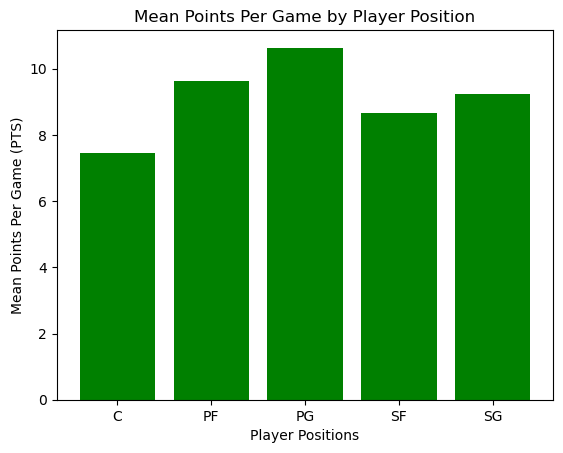

In [19]:
positions_list = []
mean_pts_list = []

for position in positions: 
    subset = df3[df3["Position"] == position]["PTS"]
    
    statFunc = np.mean
    statVal = statFunc(subset)
    
    positions_list.append(position)
    mean_pts_list.append(statVal)
    
# Bar chart for PTS
plt.bar(positions_list, mean_pts_list, color='green')
plt.xlabel('Player Positions')
plt.ylabel('Mean Points Per Game (PTS)')
plt.title('Mean Points Per Game by Player Position')

plt.show()

## PG Data

In [20]:
# include relevant columns associated to the PG position
relevant_columns = ['Player Name', 'AST', 'FG', '3P', '2P', 'FT', 'PTS', 'STL', 'TOV', 'Position']

# create new dataset exclusively only for PGs
df_pg = df3[df3['Position'] == 'PG'][relevant_columns]

# display the updated datset ONLY for PGs
print(df_pg)


Column Name        Player Name   AST   FG   3P   2P   FT   PTS  STL  TOV  \
177               Jared Butler   1.3  2.5  1.2  1.3  0.0   6.2  0.8  0.8   
178          Lindell Wigginton   2.0  2.6  0.9  1.7  1.1   7.1  0.0  1.7   
179                Skylar Mays   8.3  5.7  2.0  3.7  2.0  15.3  1.0  1.7   
180          Tyrese Haliburton  10.4  7.4  2.9  4.5  3.1  20.7  1.6  2.5   
181              Frank Jackson   1.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0   
..                         ...   ...  ...  ...  ...  ...   ...  ...  ...   
249                  John Wall   5.2  4.1  1.0  3.1  2.3  11.4  0.8  2.4   
250             Damian Lillard   7.3  9.6  4.2  5.4  8.8  32.2  0.9  3.3   
251               Kemba Walker   2.1  2.7  0.8  1.9  1.9   8.0  0.2  0.4   
252          Russell Westbrook   7.5  5.9  1.2  4.7  2.8  15.9  1.0  3.5   
253               Jrue Holiday   7.4  7.3  2.4  5.0  2.3  19.3  1.2  2.9   

Column Name Position  
177               PG  
178               PG  
179               

In [21]:
# print out the leading PG per category 
leading_players = df_pg.set_index('Player Name').loc[:, 'AST':'TOV'].idxmax()
print(leading_players)

Column Name
AST               James Harden
FG     Shai Gilgeous-Alexander
3P               Stephen Curry
2P     Shai Gilgeous-Alexander
FT     Shai Gilgeous-Alexander
PTS             Damian Lillard
STL              Jacob Gilyard
TOV                 Trae Young
dtype: object


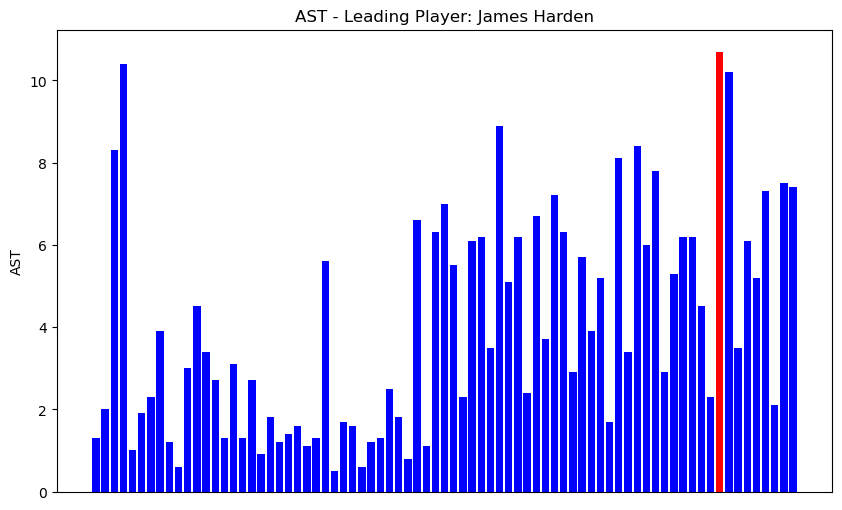

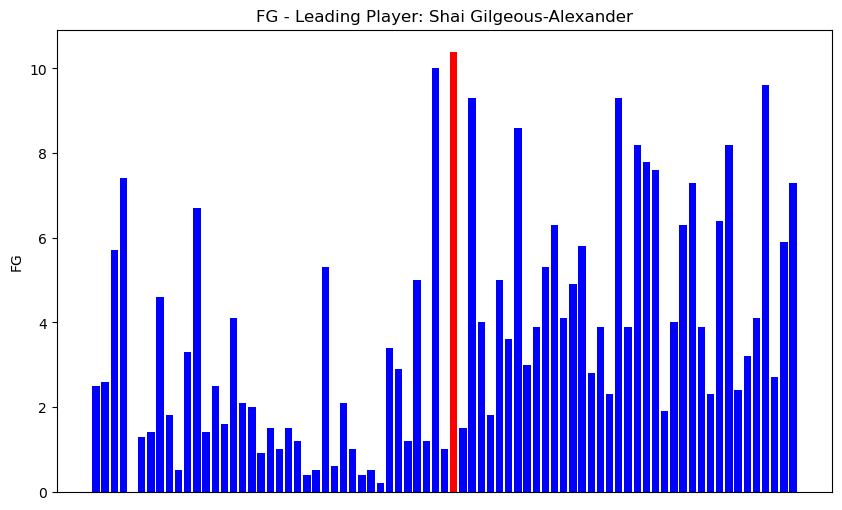

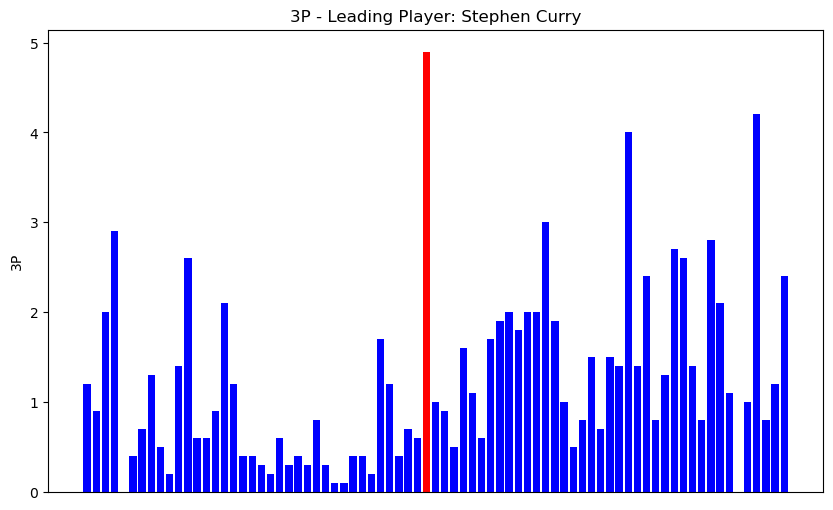

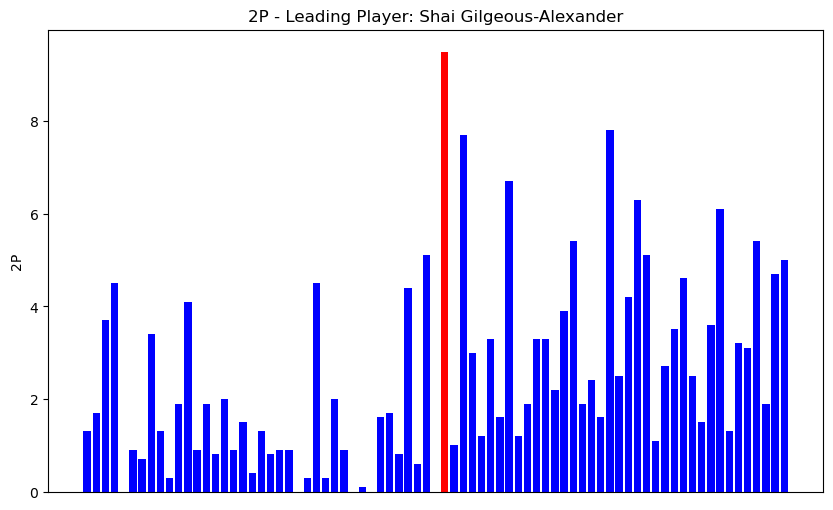

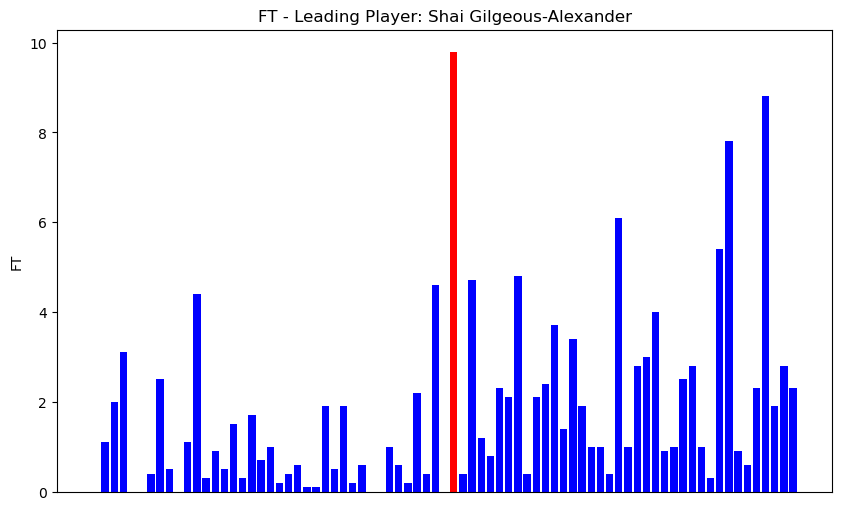

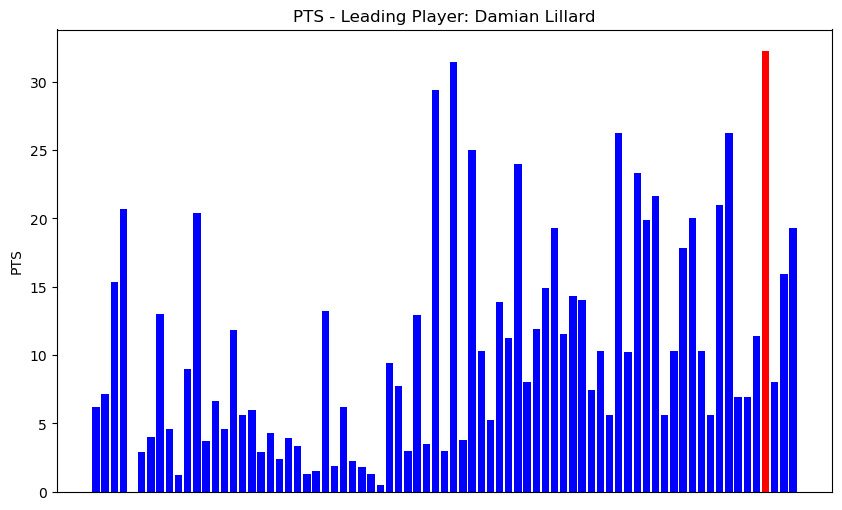

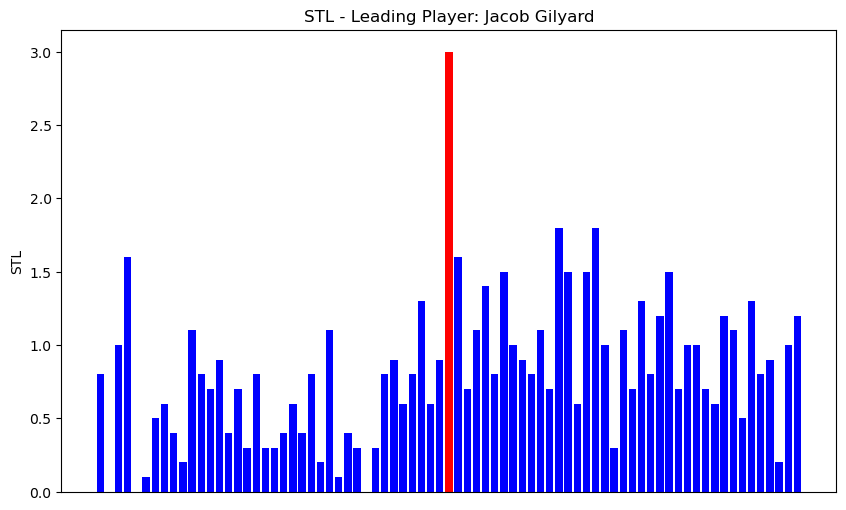

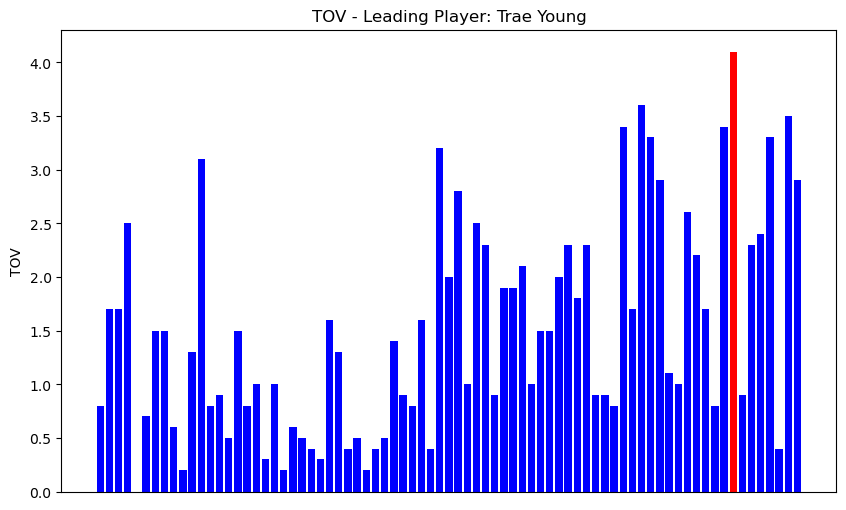

In [53]:
# bar chart for each category
for category, player in leading_players.items():
    plt.figure(figsize = (10, 6))
    plt.bar(df_pg['Player Name'], df_pg[category], color = (df_pg['Player Name'] == player).map({True: 'red', False: 'blue'}))
    plt.title(f'{category} - Leading Player: {player}')
    plt.xticks([])
    plt.ylabel(category)
    plt.show()

## SG Data

In [23]:
# include relevant columns associated to the SG position
sg_columns = ['Player Name', 'AST', 'FG', '3P', '2P', 'FT', 'PTS', 'STL', 'Position']

# create new dataset exclusively only for SGs
df_sg = df3[df3['Position'] == 'SG'][sg_columns]

# display the updated datset ONLY for SGs
print(df_sg)

Column Name      Player Name  AST   FG   3P   2P   FT   PTS  STL Position
350              Tyler Herro  4.2  7.3  3.0  4.2  2.5  20.1  0.8       SG
351           Malaki Branham  1.9  4.1  1.2  2.9  0.9  10.2  0.5       SG
352            Austin Rivers  1.4  1.8  0.8  0.9  0.6   4.9  0.5       SG
353           Romeo Langford  1.2  2.8  0.4  2.4  0.9   6.9  0.6       SG
354             Trevor Keels  0.0  0.3  0.3  0.0  0.0   1.0  0.0       SG
..                       ...  ...  ...  ...  ...  ...   ...  ...      ...
460               Jaden Ivey  5.2  5.5  1.6  3.9  3.6  16.3  0.8       SG
461              Ayo Dosunmu  2.6  3.5  0.7  2.8  0.8   8.6  0.8       SG
462          Dejounte Murray  6.1  8.3  1.8  6.5  2.1  20.5  1.5       SG
463            Malik Beasley  1.5  4.6  2.9  1.7  0.6  12.7  0.8       SG
464          James Bouknight  1.2  2.0  1.0  1.1  0.6   5.6  0.4       SG

[115 rows x 9 columns]


In [24]:
# print out leading SG per category 
leading_sg = df_sg.set_index('Player Name').loc[:, 'AST':'STL'].idxmax()
print(leading_sg)

Column Name
AST       Dejounte Murray
FG       Donovan Mitchell
3P       Donovan Mitchell
2P           Devin Booker
FT           Devin Booker
PTS      Donovan Mitchell
STL    Shaquille Harrison
dtype: object


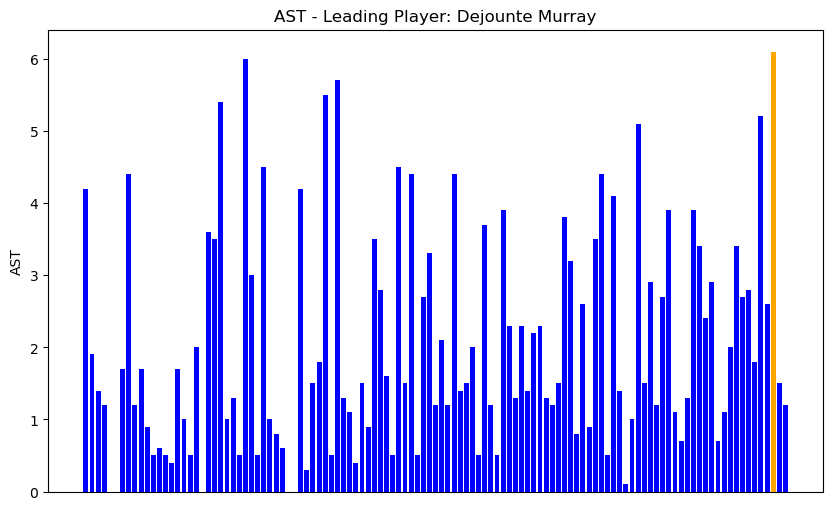

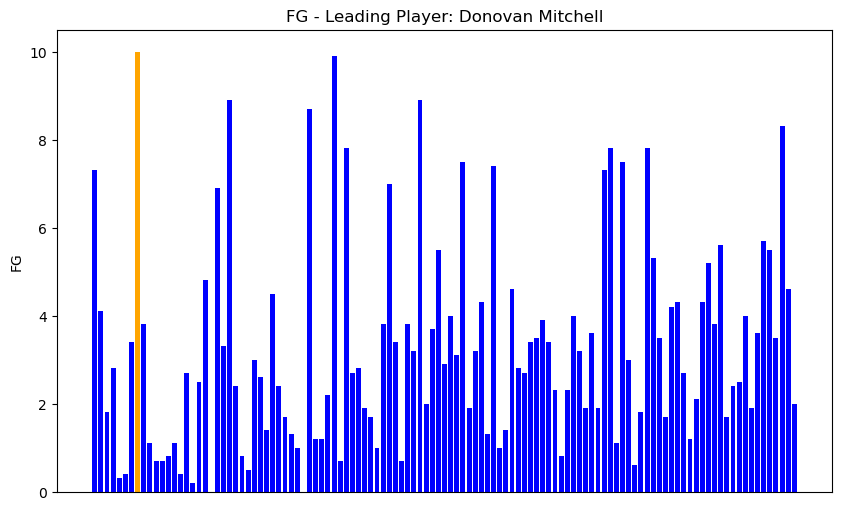

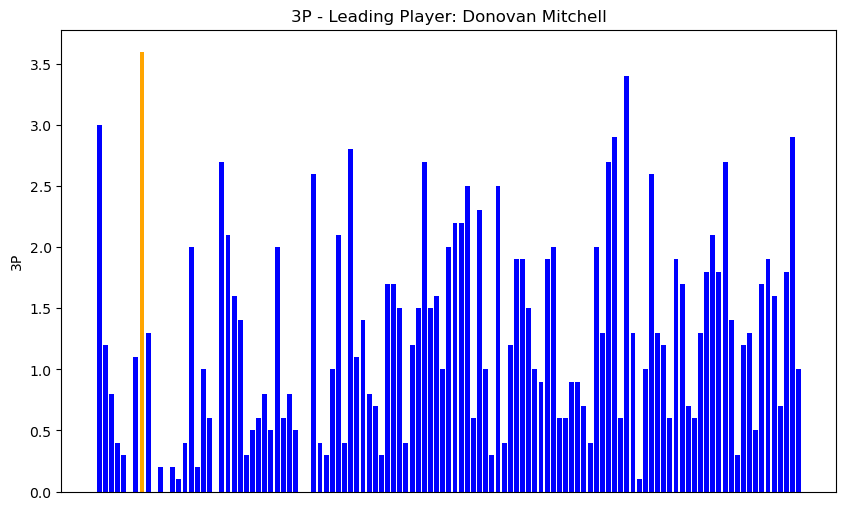

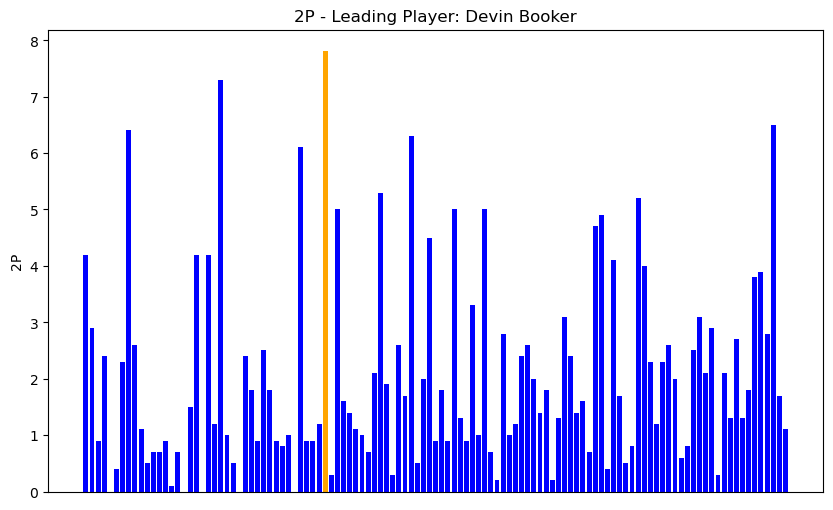

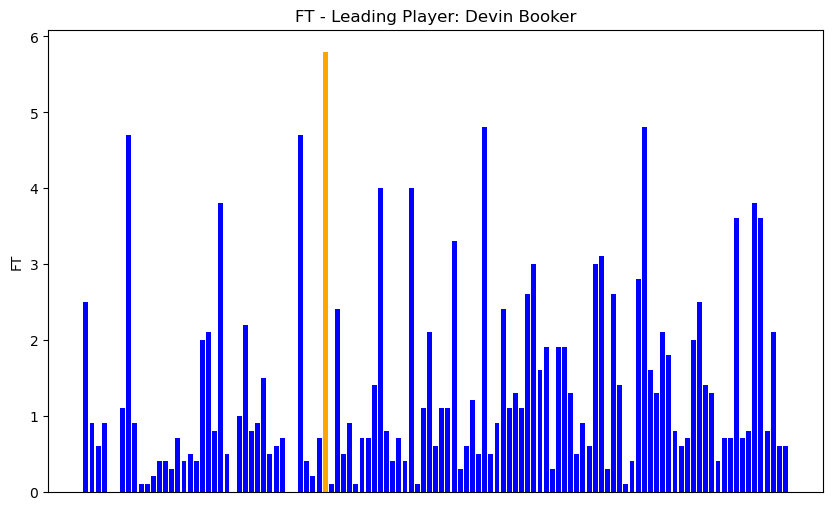

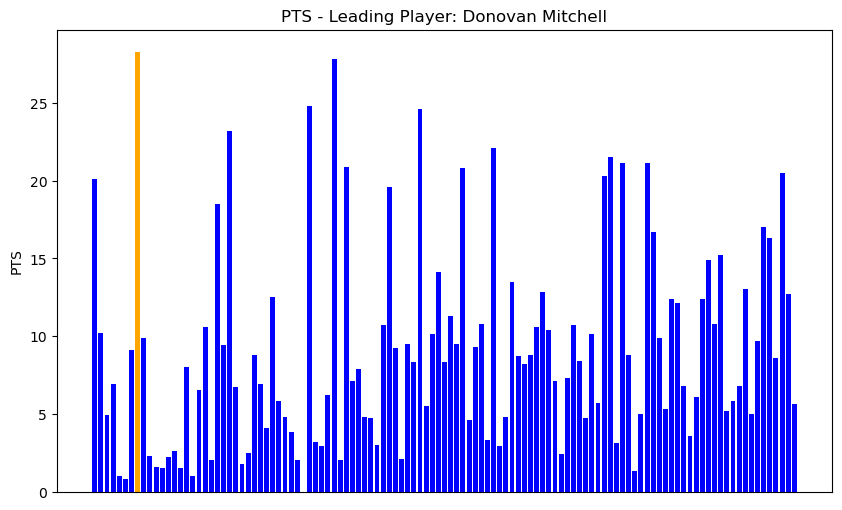

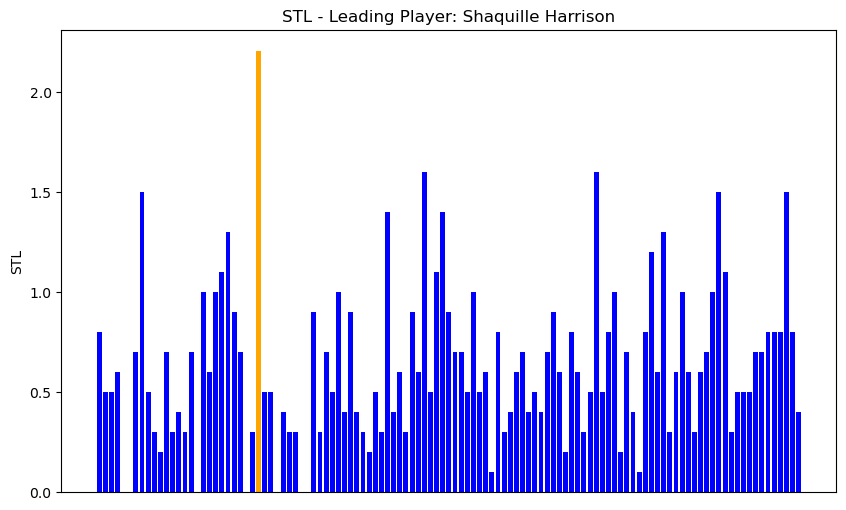

In [25]:
# bar chart for each category
for category, player in leading_sg.items():
    plt.figure(figsize = (10, 6))
    plt.bar(df_sg['Player Name'], df_sg[category], color = (df_sg['Player Name'] == player).map({True: 'orange', False: 'blue'}))
    plt.title(f'{category} - Leading Player: {player}')
    plt.xticks([])
    plt.ylabel(category)
    plt.show()

## SF Data

In [26]:
# include relevant columns associated to the SF position
sf_columns = ['Player Name', 'FG', '3P', '2P', 'FT', 'PTS', 'STL', 'ORB', 'DRB', 'TRB', 'BLK', 'Position']

# create new dataset exclusively only for SFs
df_sf = df3[df3['Position'] == 'SF'][sf_columns]

# display the updated datset ONLY for SFs
print(df_sf)

Column Name       Player Name   FG   3P   2P   FT   PTS  STL  ORB  DRB  TRB  \
256             Lamar Stevens  2.1  0.5  1.6  0.6   5.3  0.4  0.8  2.6  3.3   
257             Naji Marshall  3.2  0.9  2.4  1.8   9.1  0.7  0.6  3.0  3.6   
258            Brandon Ingram  9.0  1.4  7.6  5.3  24.7  0.7  0.5  5.0  5.5   
259             Luguentz Dort  4.6  1.8  2.8  2.7  13.7  1.0  1.7  2.9  4.6   
260             Klay Thompson  7.9  4.4  3.6  1.7  21.9  0.7  0.6  3.6  4.1   
..                        ...  ...  ...  ...  ...   ...  ...  ...  ...  ...   
342           Jaden McDaniels  4.7  1.4  3.3  1.3  12.1  0.9  1.2  2.7  3.9   
343          MarJon Beauchamp  1.8  0.9  0.9  0.5   5.1  0.4  0.7  1.5  2.2   
344           Stanley Johnson  2.2  0.6  1.6  0.9   5.8  0.5  0.7  2.4  3.2   
345              Chris Duarte  2.7  1.2  1.5  1.3   7.9  0.5  0.4  2.1  2.5   
346           Pat Connaughton  2.7  1.8  0.9  0.4   7.6  0.6  0.8  3.8  4.6   

Column Name  BLK Position  
256          0.3       

In [27]:
# print out leading SF per category 
leading_sf = df_sf.set_index('Player Name').loc[:, 'FG':'BLK'].idxmax()
print(leading_sf)

Column Name
FG       Jaylen Brown
3P      Klay Thompson
2P      DeMar DeRozan
FT       Jayson Tatum
PTS      Jayson Tatum
STL        OG Anunoby
ORB    Scottie Barnes
DRB      Jayson Tatum
TRB      Jayson Tatum
BLK     Justin Minaya
dtype: object


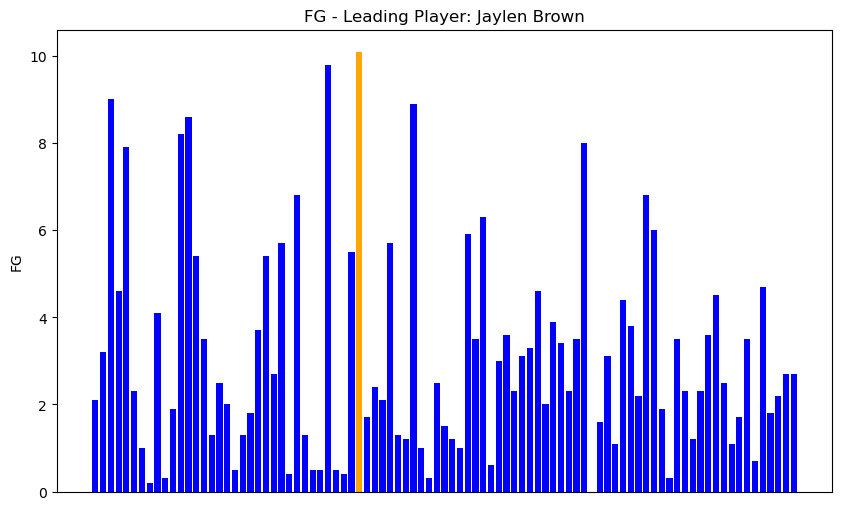

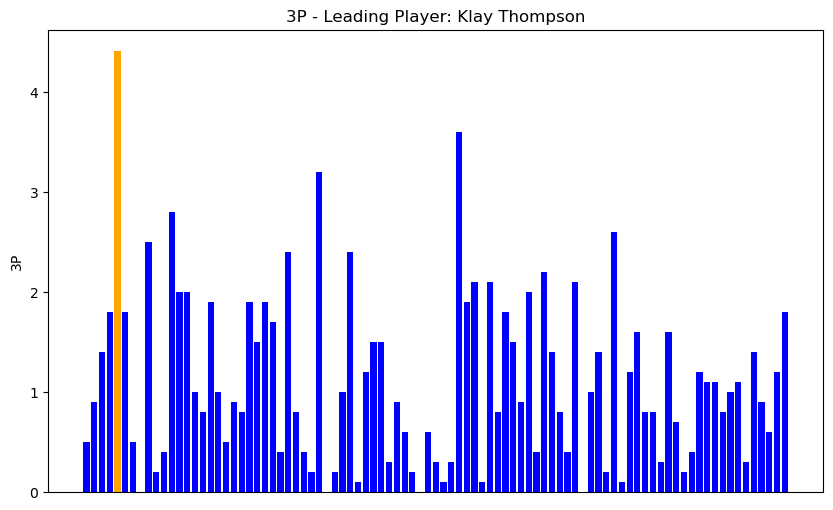

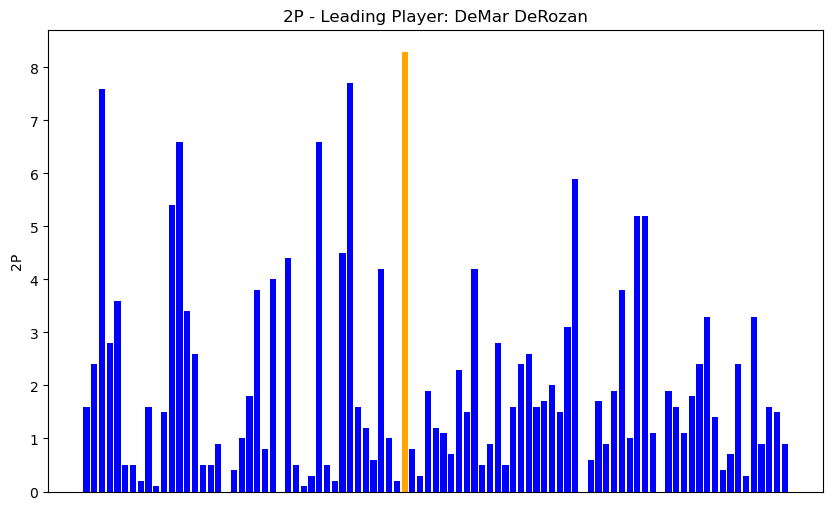

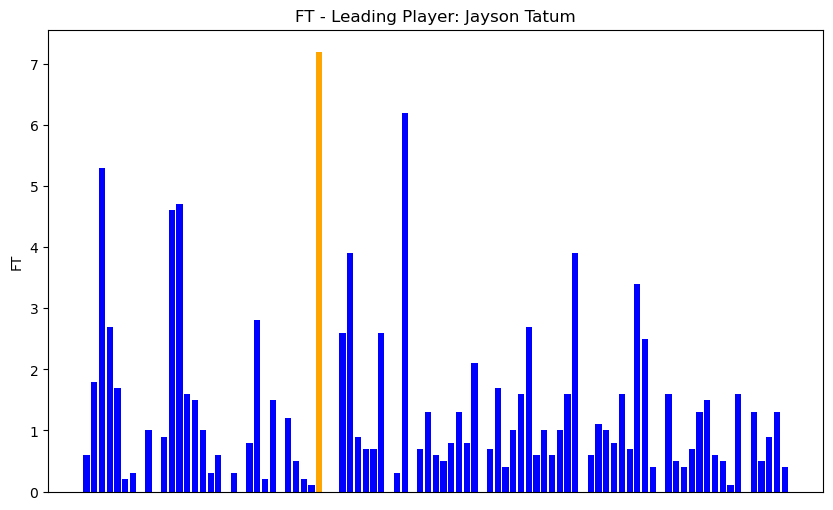

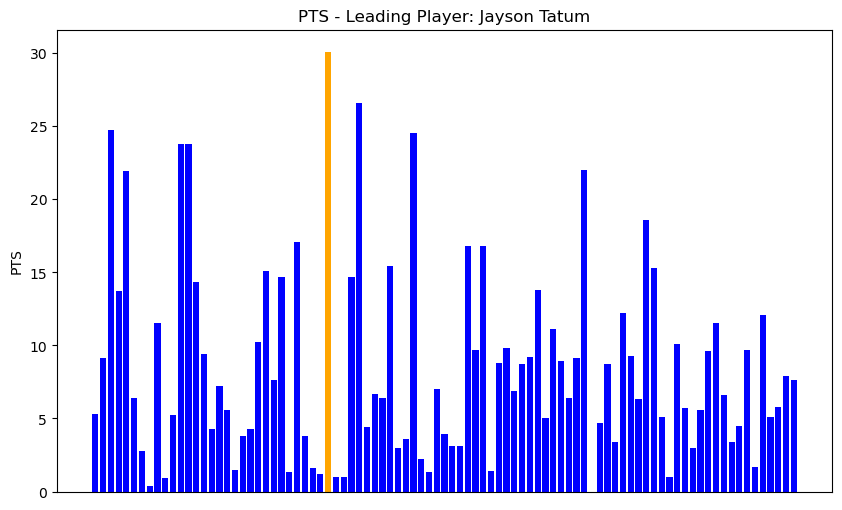

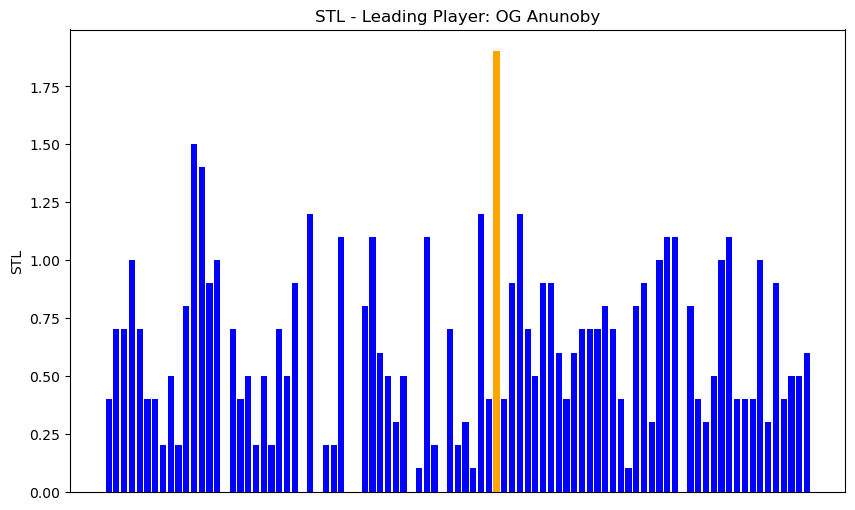

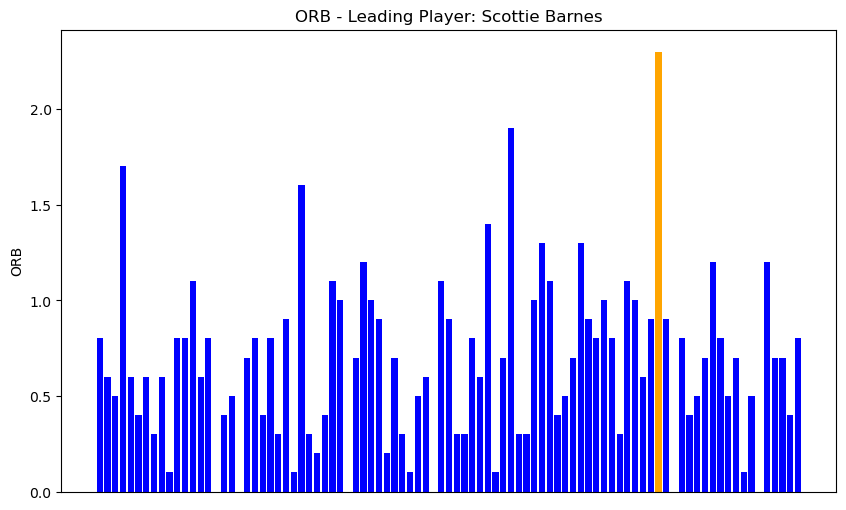

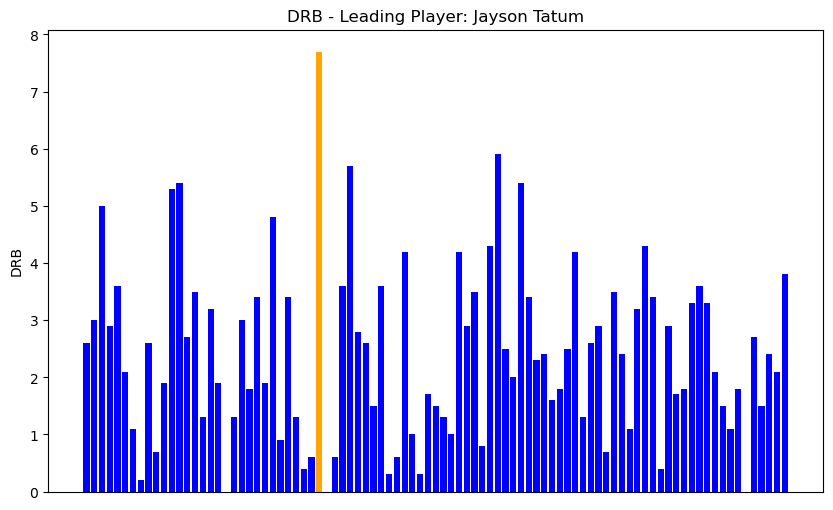

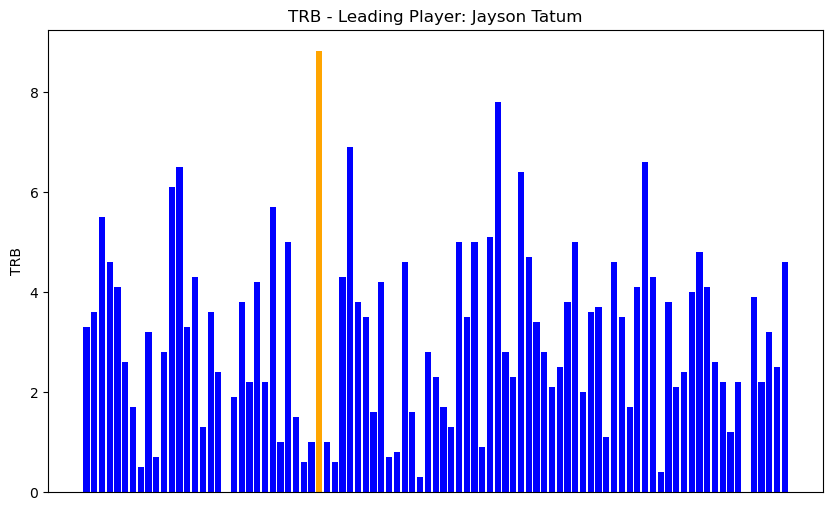

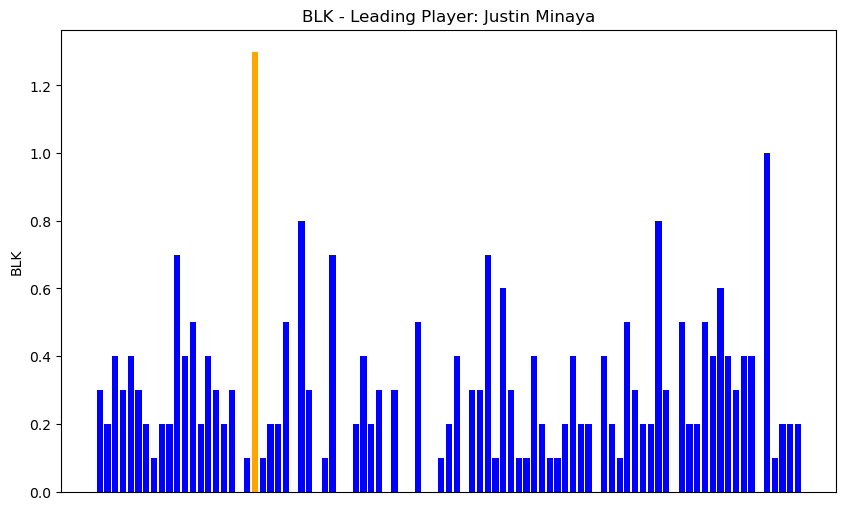

In [28]:
# bar chart for each category
for category, player in leading_sf.items():
    plt.figure(figsize = (10, 6))
    plt.bar(df_sf['Player Name'], df_sf[category], color = (df_sf['Player Name'] == player).map({True: 'orange', False: 'blue'}))
    plt.title(f'{category} - Leading Player: {player}')
    plt.xticks([])
    plt.ylabel(category)
    plt.show()

## PF Data

In [29]:
# include relevant columns associated to the PF position
pf_columns = ['Player Name', 'FG', '2P', 'FT', 'PTS', 'ORB', 'DRB', 'TRB', 'BLK', '2P%', 'Position']

# create new dataset exclusively only for PFs
df_pf = df3[df3['Position'] == 'PF'][pf_columns]

# display the updated datset ONLY for PFs
print(df_pf)

Column Name         Player Name   FG   2P   FT   PTS  ORB  DRB  TRB  BLK  \
91                Pascal Siakam  8.9  7.6  5.2  24.2  1.8  6.0  7.8  0.5   
92              Harrison Barnes  4.6  3.0  4.3  15.0  1.1  3.4  4.5  0.1   
93                   Jamal Cain  2.1  1.7  0.9   5.4  0.8  2.1  2.9  0.1   
94                  Evan Mobley  6.6  6.4  2.6  16.2  2.4  6.6  9.0  1.5   
95           Karl-Anthony Towns  7.3  5.2  4.1  20.8  1.7  6.5  8.1  0.6   
..                          ...  ...  ...  ...   ...  ...  ...  ...  ...   
172                   Dean Wade  1.7  0.6  0.3   4.7  0.5  3.0  3.4  0.5   
173                 Maxi Kleber  2.1  1.0  0.7   5.9  0.8  2.8  3.6  0.8   
174                     JT Thor  1.4  0.8  0.5   3.8  0.5  1.7  2.2  0.3   
175             Trendon Watford  2.9  2.5  1.2   7.4  0.7  3.2  3.8  0.2   
176                  Kevin Love  2.7  1.1  1.3   8.2  1.0  5.5  6.4  0.2   

Column Name    2P% Position  
91           0.523       PF  
92           0.553       PF

In [30]:
# print out leading PF per category 
leading_pf = df_pf.set_index('Player Name').loc[:, 'FG':'2P%'].idxmax()
print(leading_pf)

Column Name
FG     Giannis Antetokounmpo
2P     Giannis Antetokounmpo
FT     Giannis Antetokounmpo
PTS    Giannis Antetokounmpo
ORB             RaiQuan Gray
DRB    Giannis Antetokounmpo
TRB    Giannis Antetokounmpo
BLK              Evan Mobley
2P%           Andre Iguodala
dtype: object


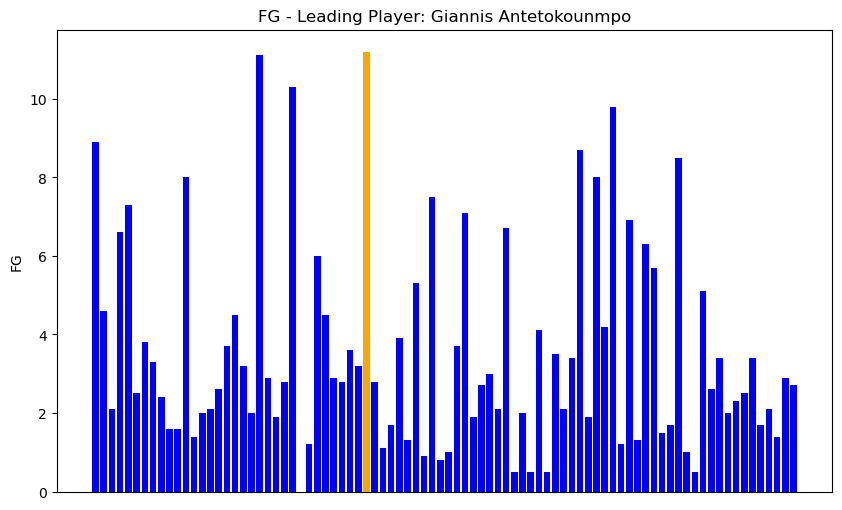

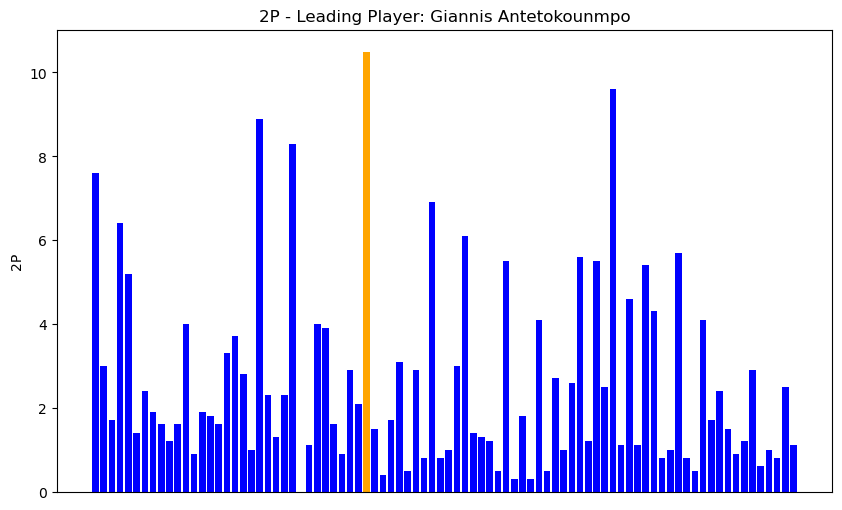

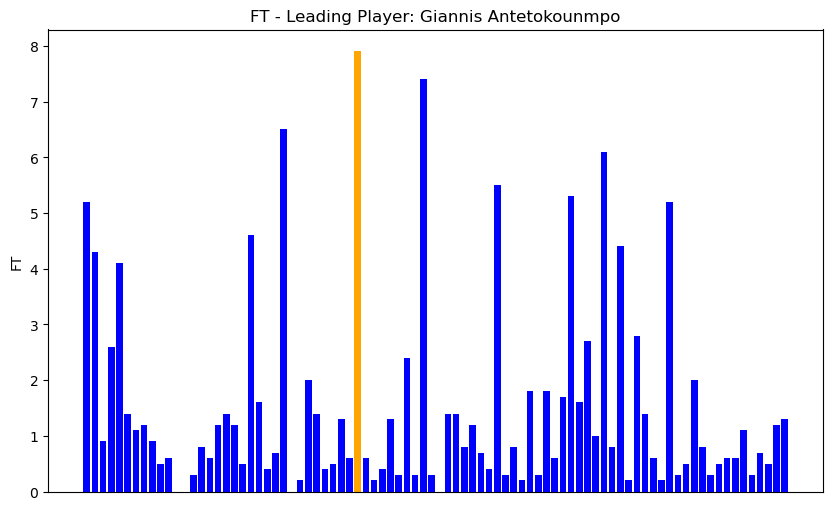

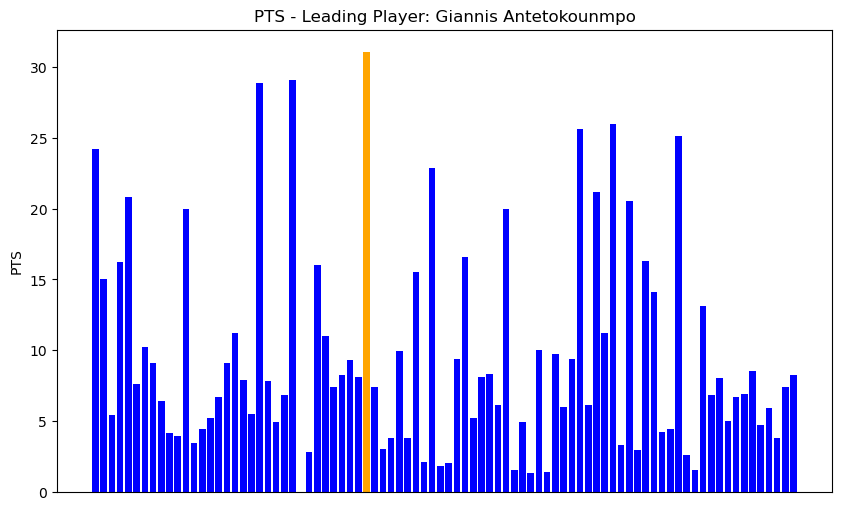

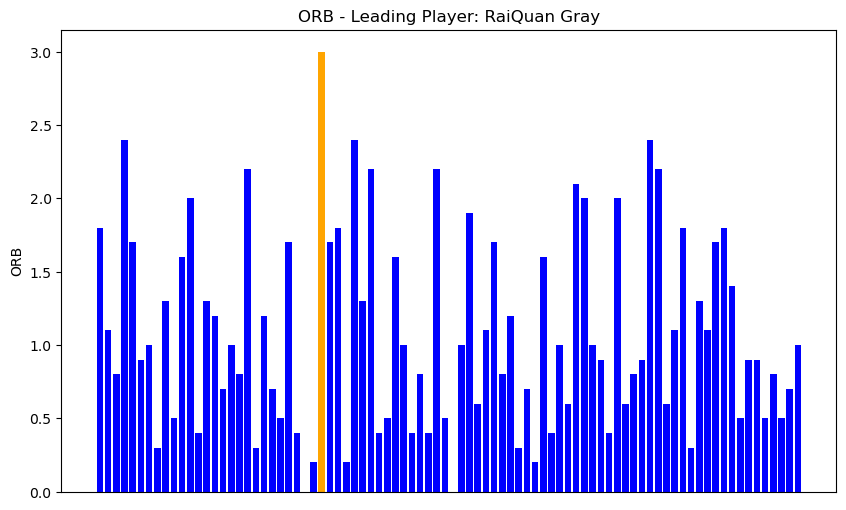

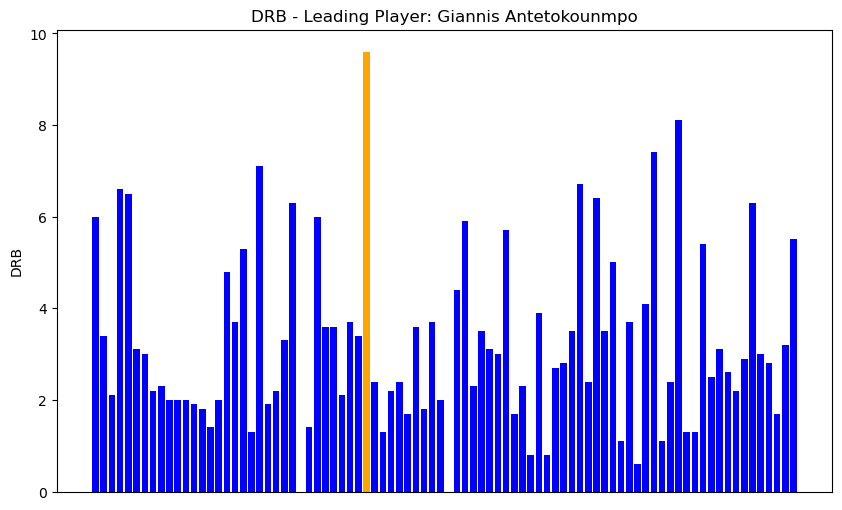

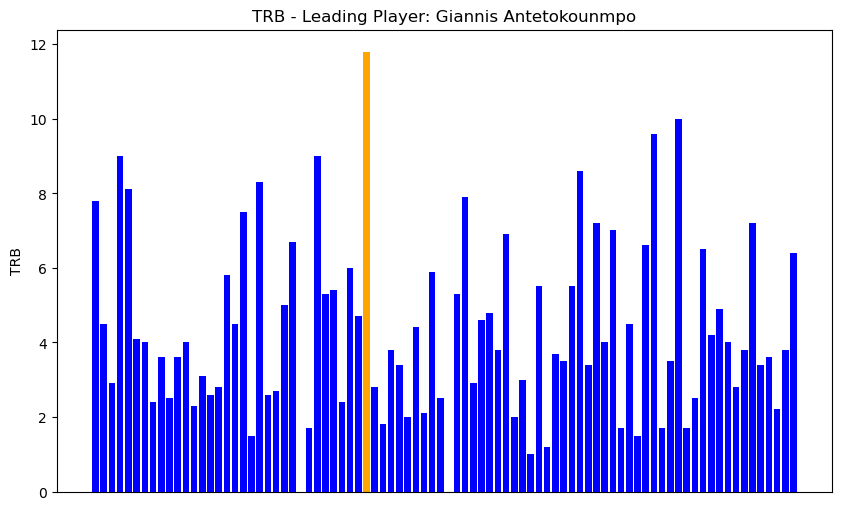

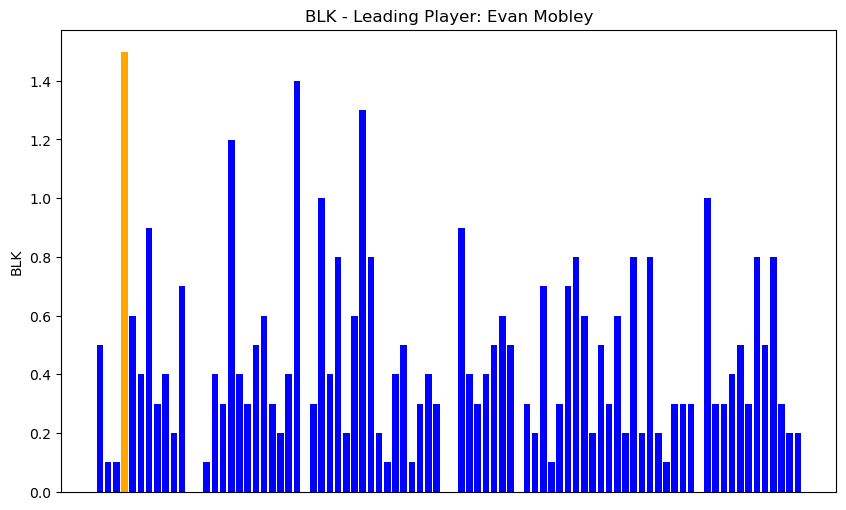

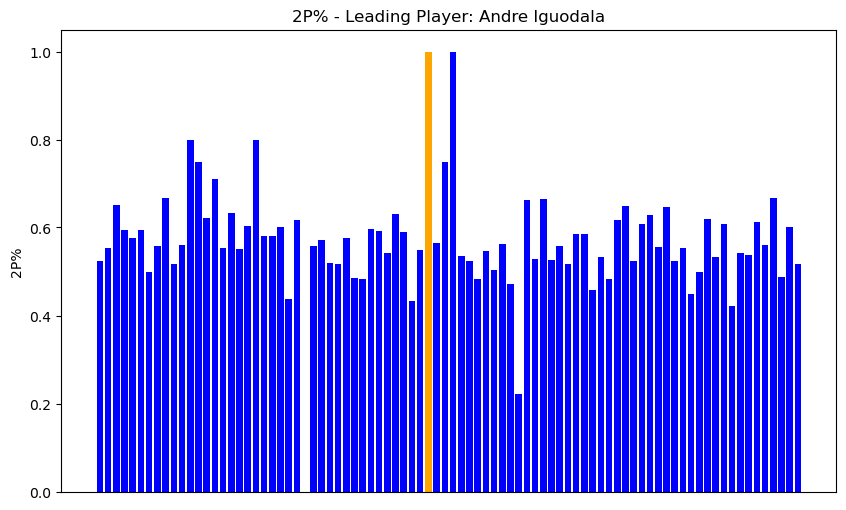

In [31]:
# bar chart for each category
for category, player in leading_pf.items():
    plt.figure(figsize = (10, 6))
    plt.bar(df_pf['Player Name'], df_pf[category], color = (df_pf['Player Name'] == player).map({True: 'orange', False: 'blue'}))
    plt.title(f'{category} - Leading Player: {player}')
    plt.xticks([])
    plt.ylabel(category)
    plt.show()

## C Data

In [32]:
# include relevant columns associated to the C position
c_columns = ['Player Name', 'FG', '2P', 'FT', 'PTS', 'ORB', 'DRB', 'TRB', 'BLK', '2P%', 'Position']

# create new dataset exclusively only for Cs
df_c = df3[df3['Position'] == 'C'][c_columns]

# display the updated datset ONLY for Cs
print(df_c)

Column Name       Player Name   FG   2P   FT   PTS  ORB  DRB  TRB  BLK    2P%  \
0               Mark Williams  3.7  3.7  1.6   9.0  2.2  4.9  7.1  1.0  0.637   
1              Udoka Azubuike  1.6  1.6  0.2   3.5  0.9  2.4  3.3  0.4  0.819   
2               Mason Plumlee  4.2  4.2  2.5  10.8  2.9  6.0  8.9  0.6  0.680   
3                 Luke Kornet  1.6  1.6  0.5   3.8  1.2  1.6  2.9  0.7  0.701   
4              Day'Ron Sharpe  1.9  1.8  0.7   4.7  2.1  2.1  4.2  0.7  0.544   
..                        ...  ...  ...  ...   ...  ...  ...  ...  ...    ...   
86              Neemias Queta  1.2  1.2  0.0   2.4  1.0  1.2  2.2  0.4  0.667   
87             Mamadi Diakite  1.1  0.8  0.1   2.6  0.4  1.0  1.4  0.4  0.586   
88                 Luka Garza  2.3  1.8  1.5   6.5  1.2  1.1  2.3  0.1  0.636   
89           Christian Koloko  1.2  1.2  0.6   3.1  1.4  1.5  2.9  1.0  0.514   
90                Bam Adebayo  8.0  8.0  4.3  20.4  2.5  6.7  9.2  0.8  0.545   

Column Name Position  
0   

In [33]:
# print out leading C per category 
leading_c = df_c.set_index('Player Name').loc[:, 'FG':'2P%'].idxmax()
print(leading_c)

Column Name
FG        Joel Embiid
2P        Joel Embiid
FT        Joel Embiid
PTS       Joel Embiid
ORB      Steven Adams
DRB     Anthony Davis
TRB     Anthony Davis
BLK       Brook Lopez
2P%    Udoka Azubuike
dtype: object


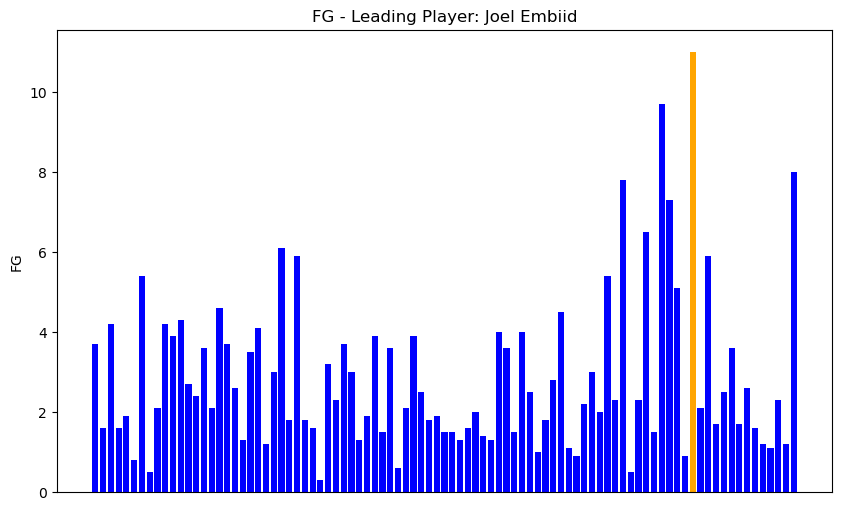

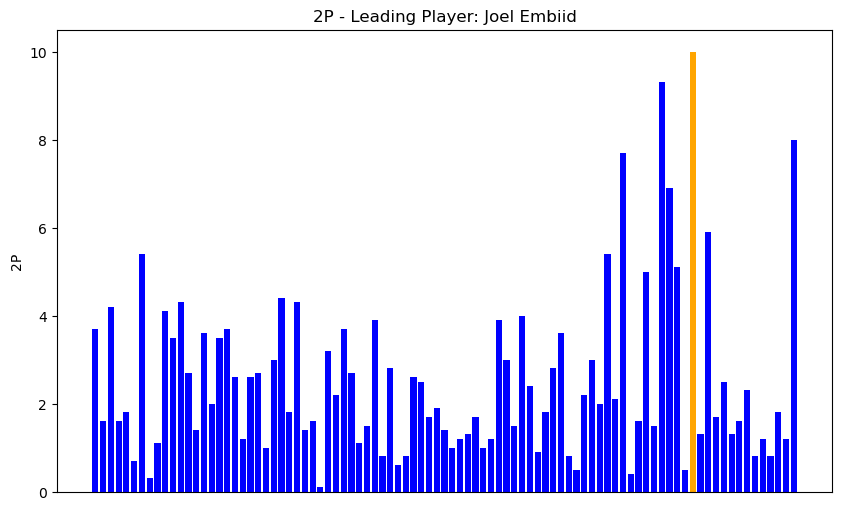

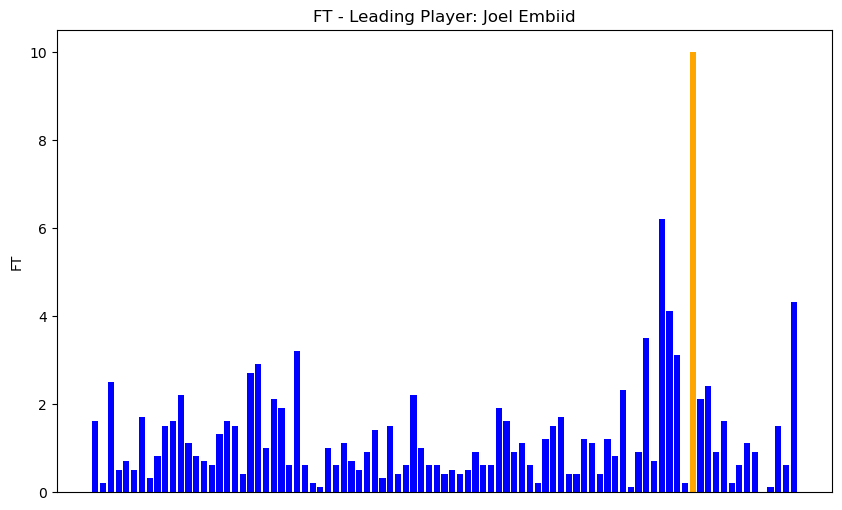

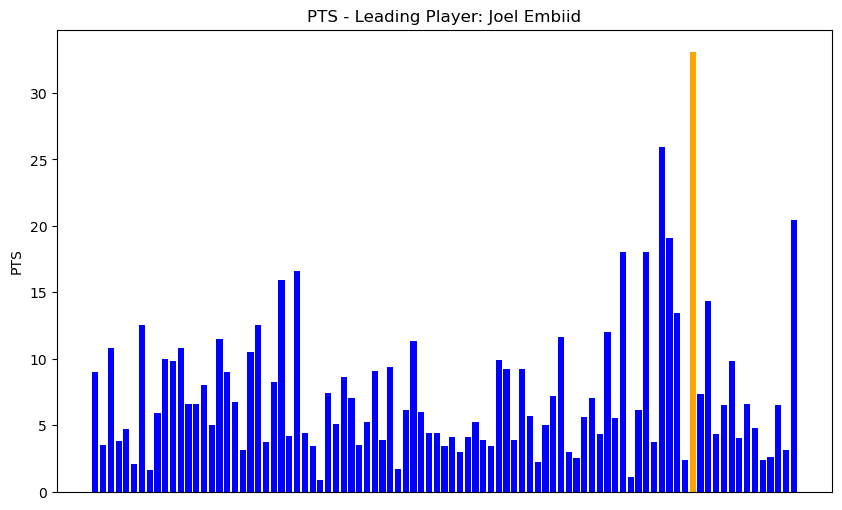

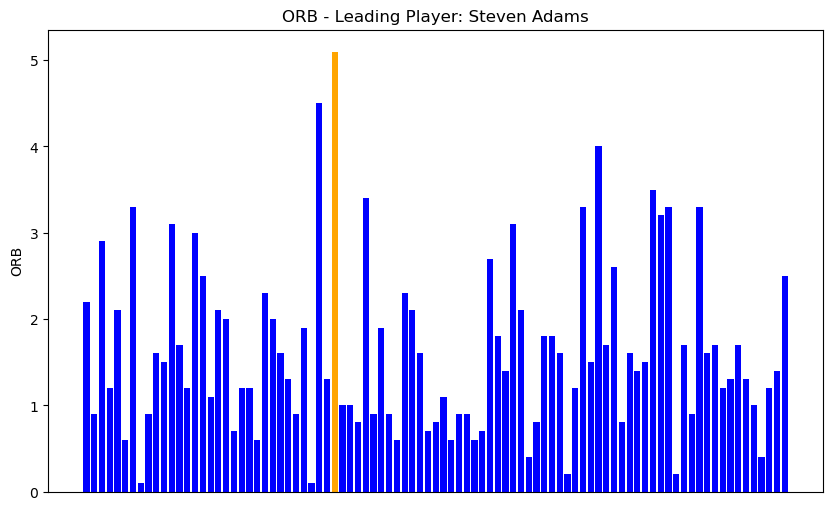

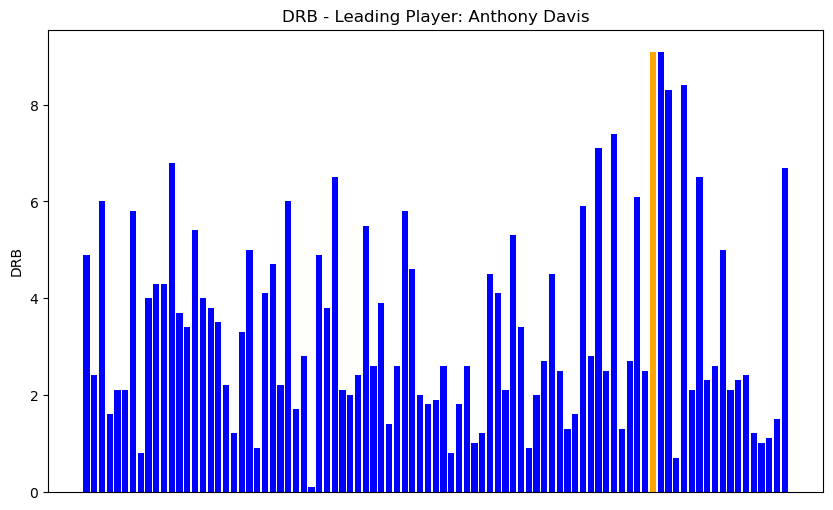

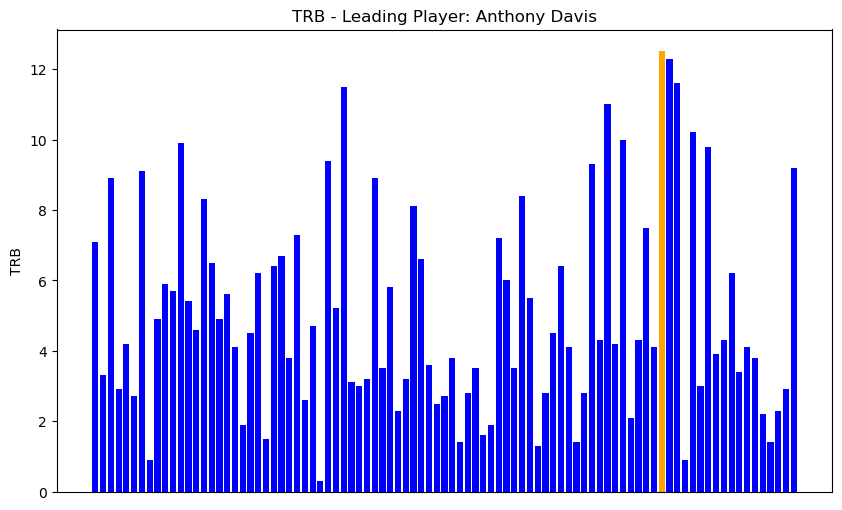

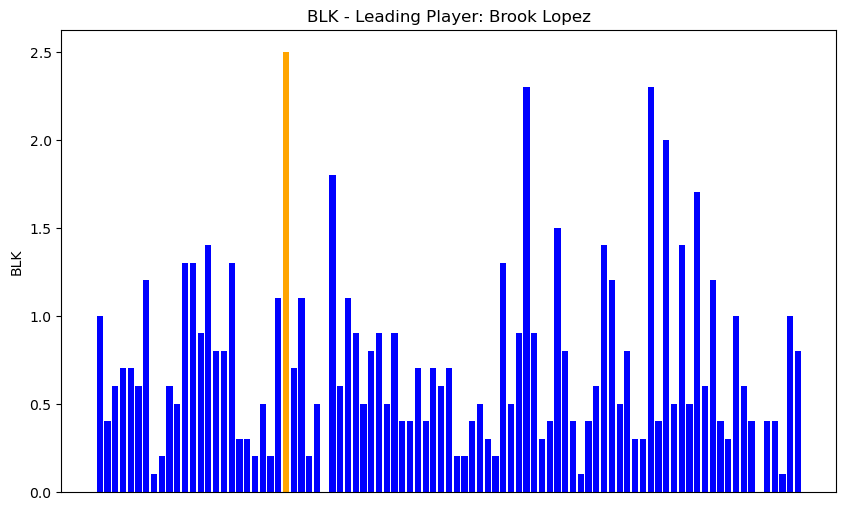

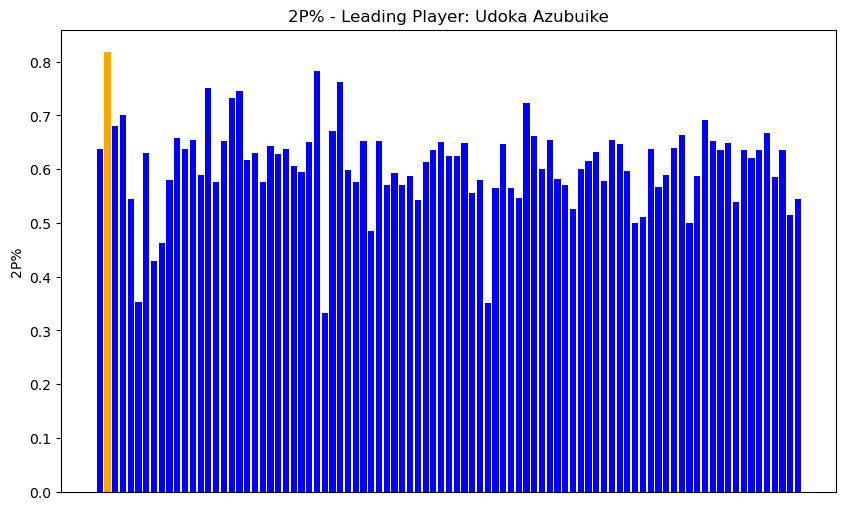

In [34]:
# bar chart for each category
for category, player in leading_c.items():
    plt.figure(figsize = (10, 6))
    plt.bar(df_c['Player Name'], df_c[category], color = (df_c['Player Name'] == player).map({True: 'orange', False: 'blue'}))
    plt.title(f'{category} - Leading Player: {player}')
    plt.xticks([])
    plt.ylabel(category)
    plt.show()

## Veteran Data (Age 30 and up)

In [35]:
# filter out the data to only include vet players
df_vet = df3[df3['Age'] >= 30]
#print(df_vet)

In [36]:
# columns for scoring
scoring_columns = ['Player Name', 'FG', '3P', '2P', 'FT', 'PTS']
df_vet_scoring = df_vet[scoring_columns]
#print(df_vet_scoring)

In [37]:
# show the leading scoring vet players 
leading_vet_scoring = df_vet_scoring.set_index('Player Name').idxmax()
print(leading_vet_scoring)

Column Name
FG       LeBron James
3P      Stephen Curry
2P       LeBron James
FT     Damian Lillard
PTS    Damian Lillard
dtype: object


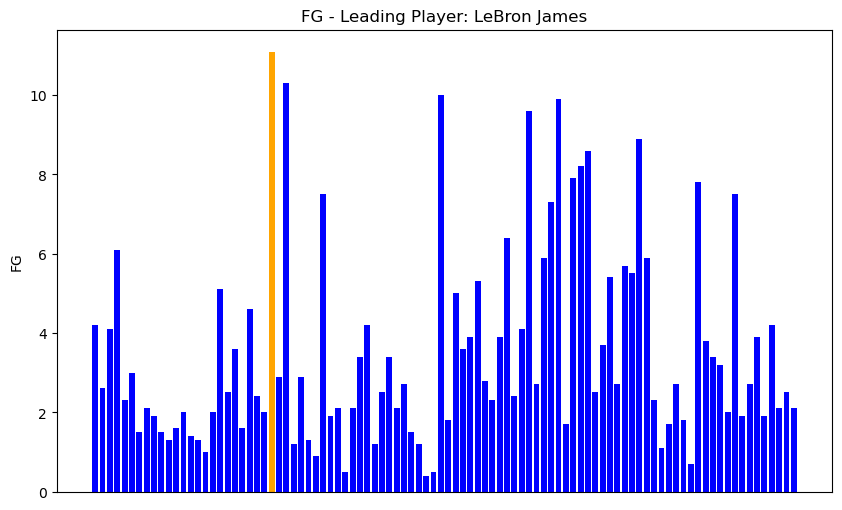

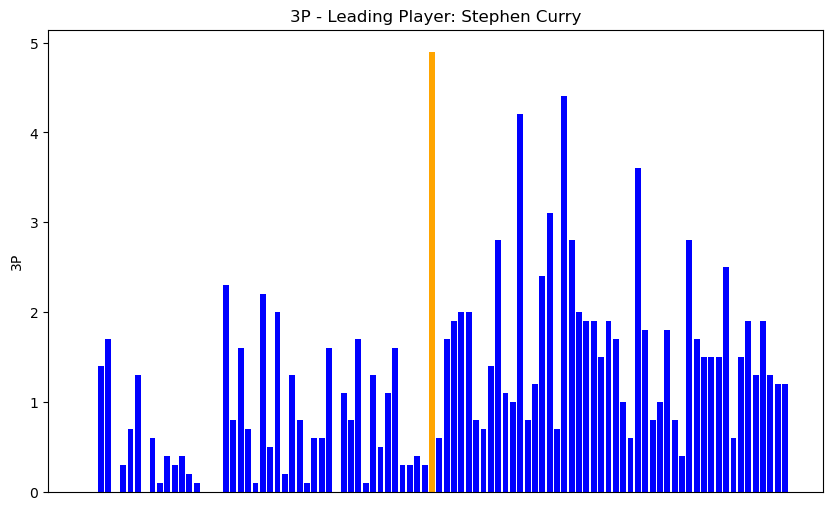

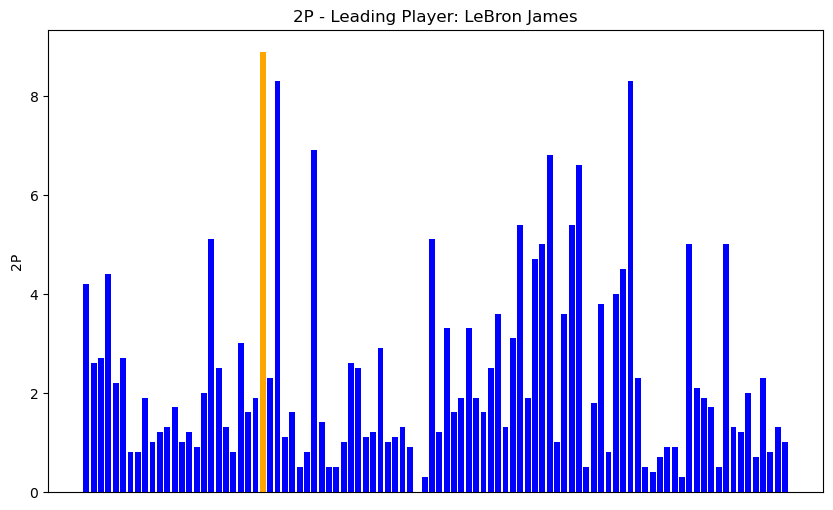

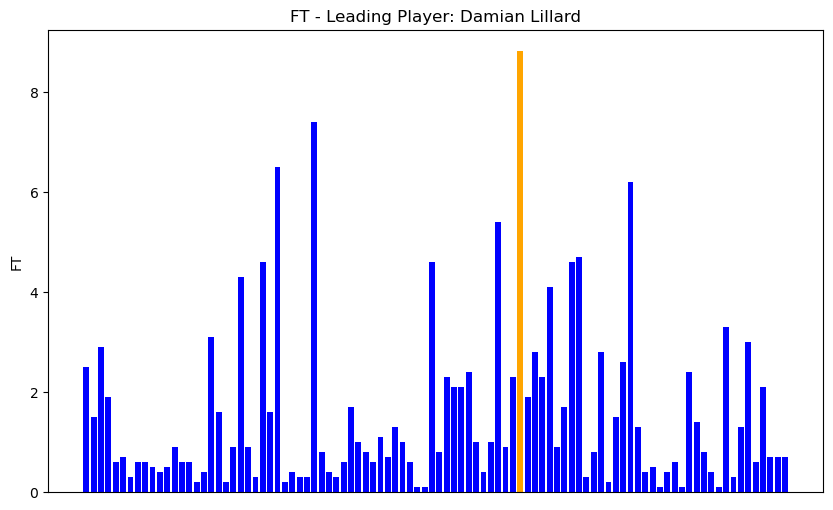

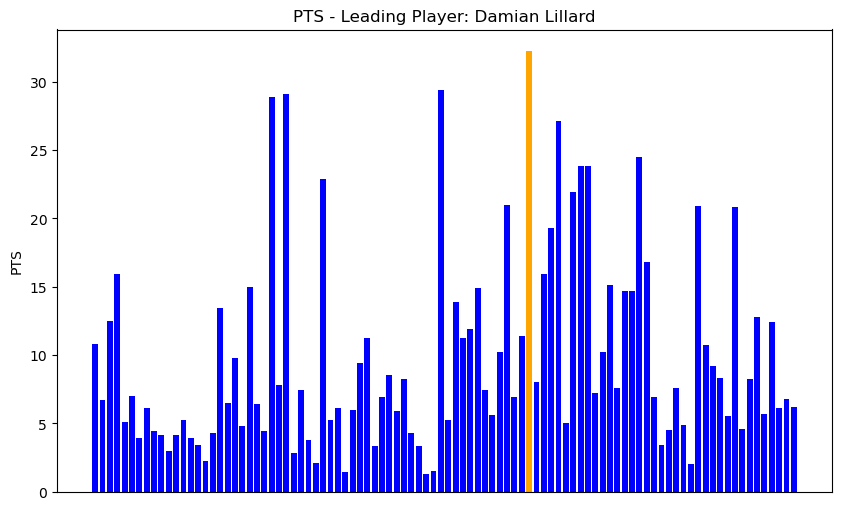

In [38]:
for category, player in leading_vet_scoring.items():
    plt.figure(figsize=(10, 6))
    plt.bar(df_vet_scoring['Player Name'], df_vet_scoring[category], color=(df_vet_scoring['Player Name'] == player).map({True: 'orange', False: 'blue'}))
    plt.title(f'{category} - Leading Player: {player}')
    plt.xticks([])
    plt.ylabel(category)
    plt.show()

In [39]:
# columns for defensive contributions
defense_columns = ['Player Name', 'STL', 'BLK', 'TRB', 'ORB', 'DRB']
df_vet_defense = df_vet[defense_columns]
#print(df_vet_defense)

In [40]:
# show the leading defensive vet players 
leading_vet_defense = df_vet_defense.set_index('Player Name').idxmax()
print(leading_vet_defense)

Column Name
STL    Jimmy Butler
BLK     Brook Lopez
TRB     Rudy Gobert
ORB     Rudy Gobert
DRB     Rudy Gobert
dtype: object


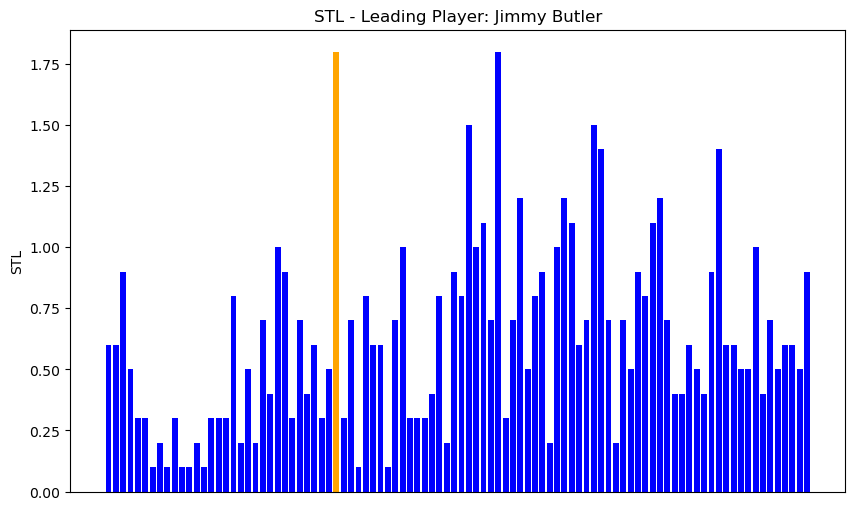

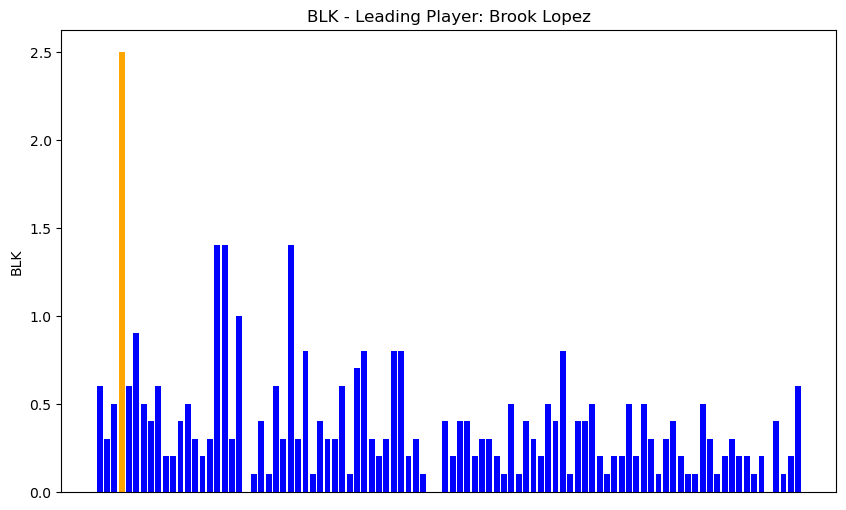

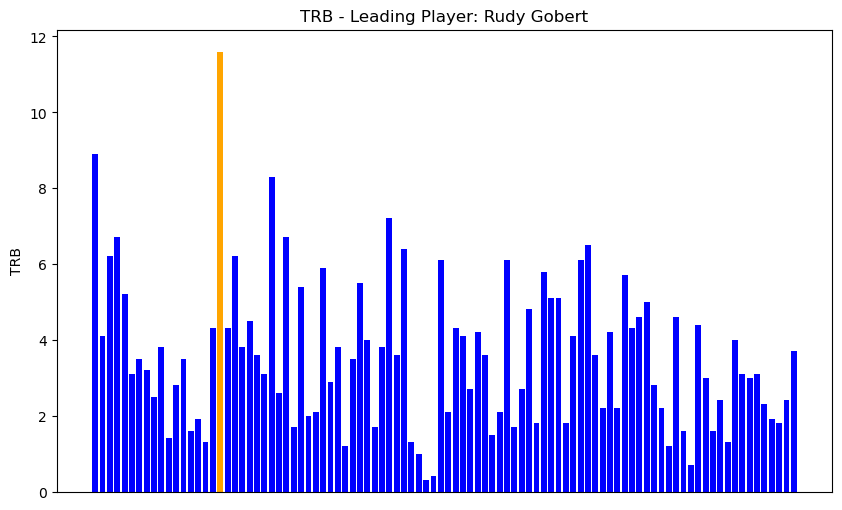

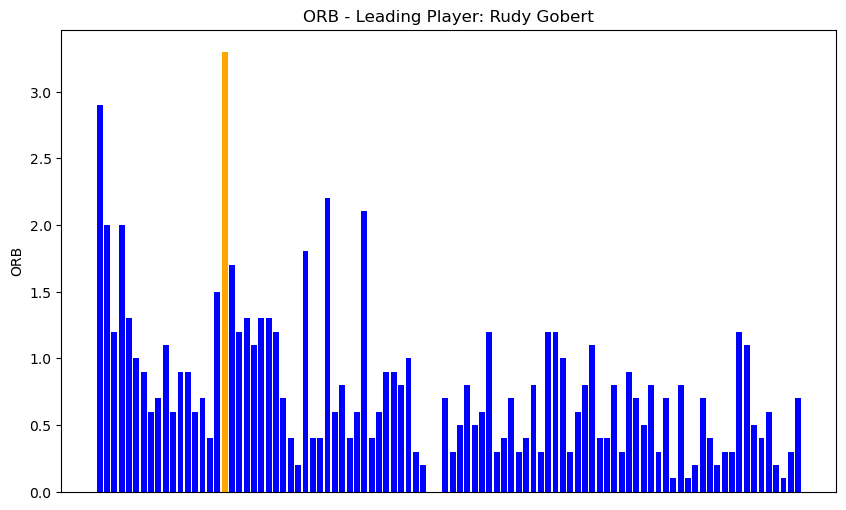

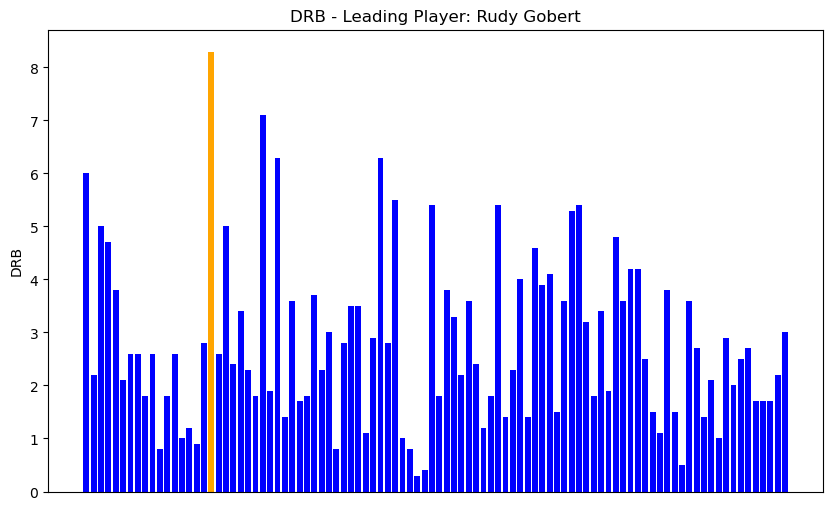

In [41]:
for category, player in leading_vet_defense.items():
    plt.figure(figsize=(10, 6))
    plt.bar(df_vet_defense['Player Name'], df_vet_defense[category], color=(df_vet_defense['Player Name'] == player).map({True: 'orange', False: 'blue'}))
    plt.title(f'{category} - Leading Player: {player}')
    plt.xticks([])
    plt.ylabel(category)
    plt.show()

In [42]:
# column for playmaking player
play_columns = ['Player Name','AST']
df_vet_play = df_vet[play_columns]
print(df_vet_play)

Column Name       Player Name  AST
2               Mason Plumlee  3.1
18              Dwight Powell  0.9
21               Kelly Olynyk  3.7
24                Brook Lopez  1.3
31             DeAndre Jordan  0.9
..                        ...  ...
432           Rodney McGruder  0.9
444               Eric Gordon  2.7
448             Evan Fournier  1.3
455               Will Barton  2.0
466          Patrick Beverley  2.9

[96 rows x 2 columns]


In [43]:
# show the leading playmaking vet players 
leading_vet_play = df_vet_play.set_index('Player Name').idxmax()
print(leading_vet_play)

Column Name
AST    James Harden
dtype: object


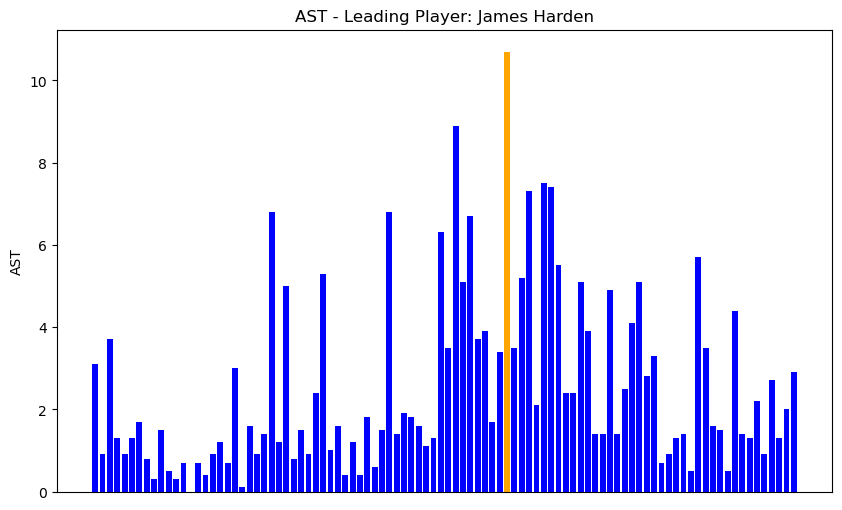

In [44]:
for category, player in leading_vet_play.items():
    plt.figure(figsize=(10, 6))
    plt.bar(df_vet_play['Player Name'], df_vet_play[category], color=(df_vet_play['Player Name'] == player).map({True: 'orange', False: 'blue'}))
    plt.title(f'{category} - Leading Player: {player}')
    plt.xticks([])
    plt.ylabel(category)
    plt.show()

In [45]:
# column for efficiency vet players
effic_columns = ['Player Name', 'FG%', '3P%', 'eFG%', 'FT%']
df_vet_effic = df_vet[effic_columns]
print(df_vet_effic)

Column Name       Player Name    FG%    3P%   eFG%    FT%
2               Mason Plumlee  0.680    NaN  0.680  0.636
18              Dwight Powell  0.732  0.000  0.732  0.667
21               Kelly Olynyk  0.499  0.394  0.583  0.853
24                Brook Lopez  0.531  0.374  0.606  0.784
31             DeAndre Jordan  0.765  1.000  0.770  0.458
..                        ...    ...    ...    ...    ...
432           Rodney McGruder  0.408  0.423  0.543  0.818
444               Eric Gordon  0.446  0.371  0.547  0.821
448             Evan Fournier  0.337  0.307  0.443  0.857
455               Will Barton  0.379  0.367  0.470  0.787
466          Patrick Beverley  0.400  0.335  0.511  0.723

[96 rows x 5 columns]


In [46]:
# show the leading efficiency vet players 
leading_vet_effic = df_vet_effic.set_index('Player Name').idxmax()
print(leading_vet_effic)

Column Name
FG%      DeAndre Jordan
3P%      DeAndre Jordan
eFG%     DeAndre Jordan
FT%     Markieff Morris
dtype: object


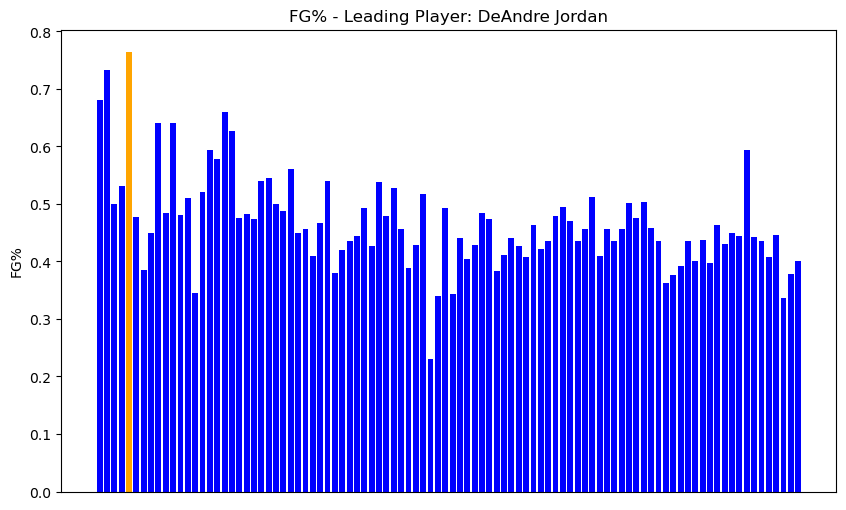

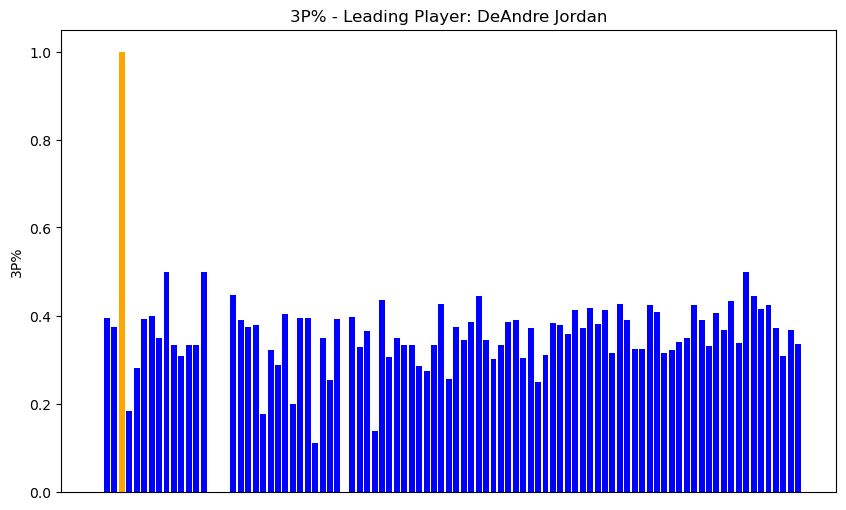

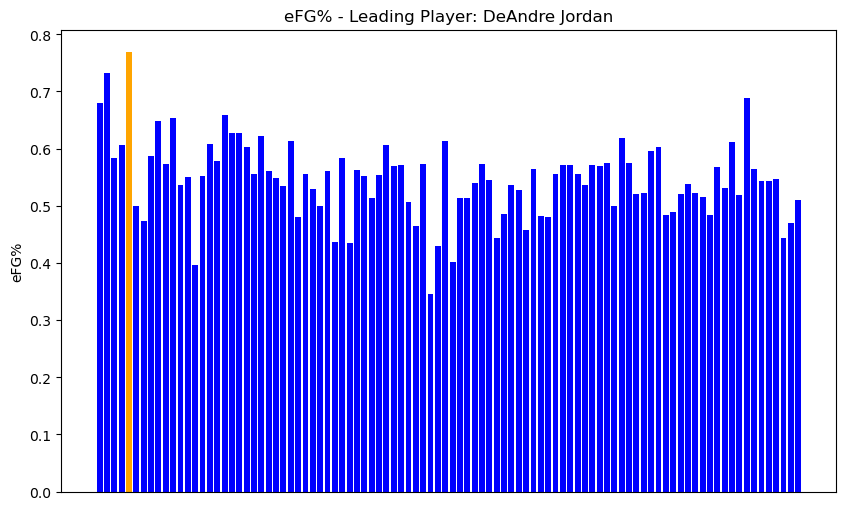

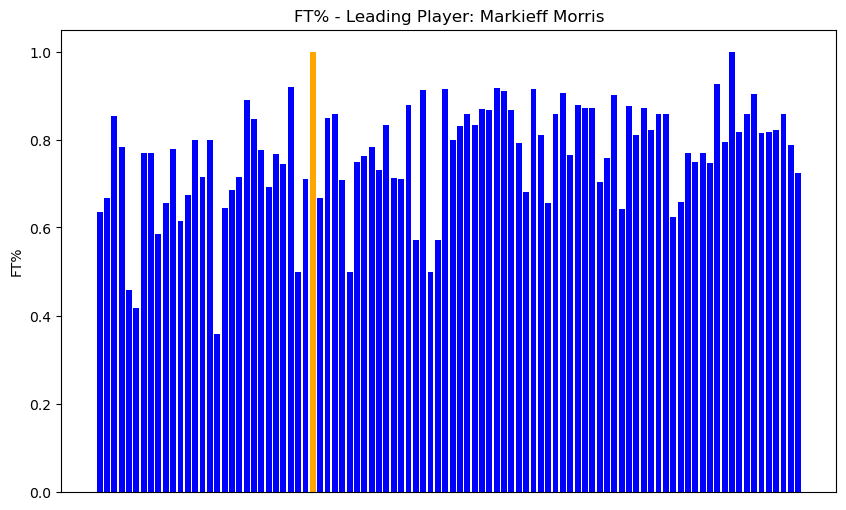

In [47]:
for category, player in leading_vet_effic.items():
    plt.figure(figsize=(10, 6))
    plt.bar(df_vet_effic['Player Name'], df_vet_effic[category], color=(df_vet_effic['Player Name'] == player).map({True: 'orange', False: 'blue'}))
    plt.title(f'{category} - Leading Player: {player}')
    plt.xticks([])
    plt.ylabel(category)
    plt.show()

In [48]:
# column for health and durability vet players
health_columns = ['Player Name', 'GP', 'MP']
df_vet_health = df_vet[health_columns]
print(df_vet_health)

Column Name       Player Name  GP    MP
2               Mason Plumlee  79  26.0
18              Dwight Powell  76  19.2
21               Kelly Olynyk  68  28.6
24                Brook Lopez  78  30.4
31             DeAndre Jordan  39  15.0
..                        ...  ..   ...
432           Rodney McGruder  32  16.4
444               Eric Gordon  69  28.5
448             Evan Fournier  27  17.0
455               Will Barton  56  17.7
466          Patrick Beverley  67  27.1

[96 rows x 3 columns]


In [49]:
# show the leading vet players for health and durability
leading_vet_health = df_vet_health.set_index('Player Name').idxmax()
print(leading_vet_health)

Column Name
GP    Harrison Barnes
MP       Kyrie Irving
dtype: object


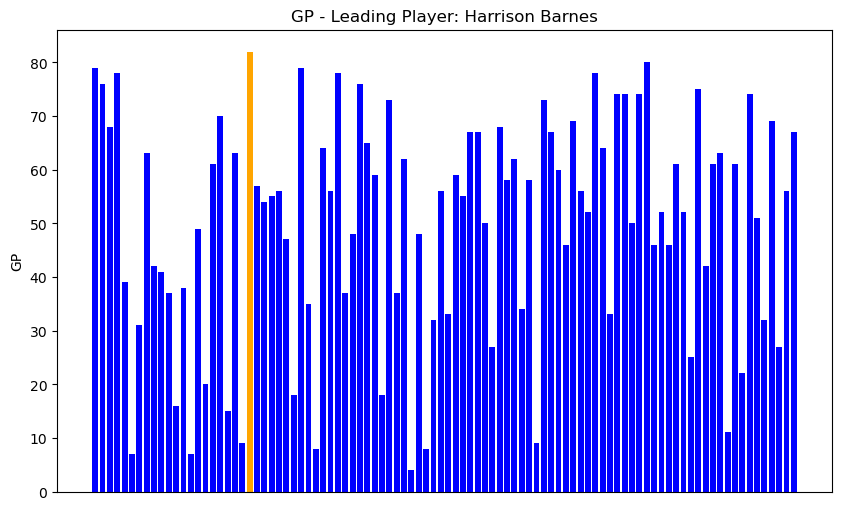

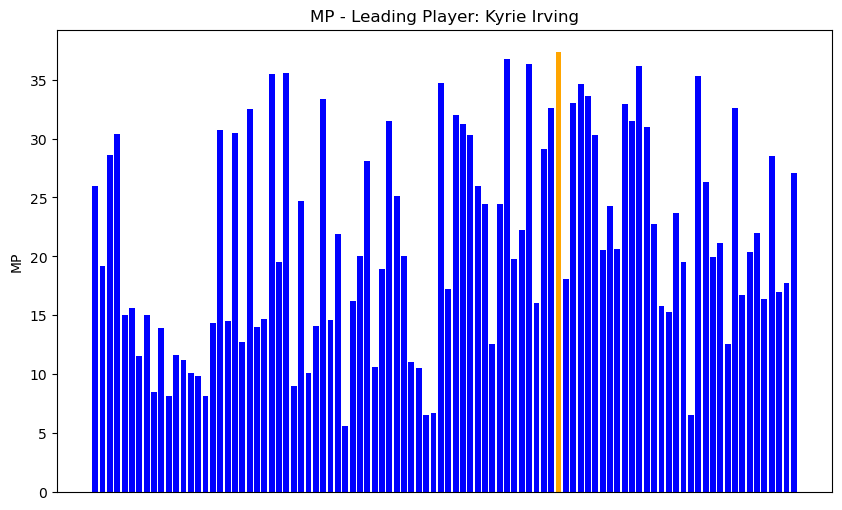

In [50]:
for category, player in leading_vet_health.items():
    plt.figure(figsize=(10, 6))
    plt.bar(df_vet_health['Player Name'], df_vet_health[category], color=(df_vet_health['Player Name'] == player).map({True: 'orange', False: 'blue'}))
    plt.title(f'{category} - Leading Player: {player}')
    plt.xticks([])
    plt.ylabel(category)
    plt.show()

## Best Players by Team

In [52]:
# include relevant columns 
relevant_columns = ['Player Name', 'AST', 'FG', '3P', '2P', 'FT', 'PTS', 'STL', 'TOV', 'Position', 'Team']

# create new dataset exclusively only for ATL
df_team = df3[df3['Team'] == 'ATL'][relevant_columns]

# display the updated datset ONLY for ATL
print(df_team)


Column Name       Player Name   AST   FG   3P   2P   FT   PTS  STL  TOV  \
52             Onyeka Okongwu   1.0  4.0  0.1  3.9  1.9   9.9  0.7  1.0   
66               Clint Capela   0.9  5.4  0.0  5.4  1.2  12.0  0.7  0.8   
165              John Collins   1.2  5.1  1.0  4.1  2.0  13.1  0.6  1.1   
186                Vit Krejci   0.6  0.5  0.2  0.3  0.0   1.2  0.2  0.2   
198             Aaron Holiday   1.4  1.5  0.6  0.9  0.4   3.9  0.6  0.6   
246                Trae Young  10.2  8.2  2.1  6.1  7.8  26.2  1.1  4.1   
291            Jarrett Culver   0.6  1.7  0.1  1.6  0.9   4.4  0.6  0.7   
294           De'Andre Hunter   1.4  5.7  1.5  4.2  2.6  15.4  0.5  1.2   
316                AJ Griffin   1.0  3.4  1.4  2.0  0.6   8.9  0.6  0.6   
334             Jalen Johnson   1.2  2.3  0.4  1.8  0.7   5.6  0.5  0.6   
359             Trent Forrest   1.7  1.1  0.0  1.1  0.1   2.3  0.3  0.7   
383          Donovan Williams   0.0  1.0  0.0  1.0  0.0   2.0  0.0  0.0   
438             Tyrese Ma

In [54]:
# print out the leading players per category 
leading_players = df_team.set_index('Player Name').loc[:, 'AST':'TOV'].idxmax()
print(leading_players)

Column Name
AST         Trae Young
FG     Dejounte Murray
3P          Trae Young
2P     Dejounte Murray
FT          Trae Young
PTS         Trae Young
STL    Dejounte Murray
TOV         Trae Young
dtype: object


In [62]:
# List of team names
team_names = df3['Team'].unique()

# Define relevant columns
relevant_columns = ['Player Name', 'AST', 'FG', '3P', '2P', 'FT', 'PTS', 'STL', 'TOV', 'Position', 'Team']

# Iterate over each team
for team_name in team_names:
    # Create a new dataset exclusively for the current team
    df_team = df3[df3['Team'] == team_name][relevant_columns]

    # Print team name
    print(f"\nTeam: {team_name}")

    # Print out the leading players per category for the current team
    leading_players = df_team.set_index('Player Name').loc[:, 'AST':'TOV'].idxmax()
    print("Leading Players:")
    for category, player in leading_players.items():
        print(f"{category}: {player}")


Team: CHO
Leading Players:
AST: LaMelo Ball
FG: LaMelo Ball
3P: LaMelo Ball
2P: Terry Rozier
FT: LaMelo Ball
PTS: LaMelo Ball
STL: LaMelo Ball
TOV: LaMelo Ball

Team: UTA
Leading Players:
AST: Kris Dunn
FG: Lauri Markkanen
3P: Lauri Markkanen
2P: Lauri Markkanen
FT: Lauri Markkanen
PTS: Lauri Markkanen
STL: Kris Dunn
TOV: Jordan Clarkson

Team: LAC/CHO
Leading Players:
AST: Mason Plumlee
FG: Mason Plumlee
3P: Mason Plumlee
2P: Mason Plumlee
FT: Mason Plumlee
PTS: Mason Plumlee
STL: Mason Plumlee
TOV: Mason Plumlee

Team: BOS
Leading Players:
AST: Marcus Smart
FG: Jaylen Brown
3P: Jayson Tatum
2P: Jaylen Brown
FT: Jayson Tatum
PTS: Jayson Tatum
STL: Marcus Smart
TOV: Jayson Tatum

Team: BRK
Leading Players:
AST: RaiQuan Gray
FG: RaiQuan Gray
3P: Royce O'Neale
2P: RaiQuan Gray
FT: Cam Thomas
PTS: RaiQuan Gray
STL: Ben Simmons
TOV: RaiQuan Gray

Team: BRK/DET
Leading Players:
AST: Nerlens Noel
FG: Nerlens Noel
3P: Nerlens Noel
2P: Nerlens Noel
FT: Nerlens Noel
PTS: Nerlens Noel
STL: Nerl